In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/full_merged_features.csv")

# Display basic info
print("✅ Data Loaded | Shape:", df.shape)
df.head()


✅ Data Loaded | Shape: (9390, 16)


,time,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover,day_of_week,month
0,2024-10-01 00:00:00,147.37,122.47,2990.72,NaN,93.22,7.09,0.31,24.6,73.0,7.3,1007.3,0.0,0.0,Tuesday,October
1,2024-10-01 01:00:00,136.25,113.73,2429.96,NaN,78.83,6.02,4.60,23.3,77.0,6.6,1006.8,0.0,0.0,Tuesday,October
2,2024-10-01 02:00:00,122.54,101.89,1949.31,NaN,56.89,5.25,21.64,23.5,71.0,8.1,1006.0,0.0,0.0,Tuesday,October
3,2024-10-01 03:00:00,104.86,86.18,1548.77,NaN,38.73,4.59,38.27,24.0,66.0,8.3,1005.8,0.0,0.0,Tuesday,October
4,2024-10-01 04:00:00,91.56,74.04,1308.44,NaN,29.82,4.05,37.55,23.8,67.0,8.2,1005.8,0.0,0.0,Tuesday,October


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  9390 non-null   object 
 1   pm10                  9150 non-null   float64
 2   pm2_5                 9150 non-null   float64
 3   carbon_monoxide       9150 non-null   float64
 4   carbon_dioxide        0 non-null      float64
 5   nitrogen_dioxide      9150 non-null   float64
 6   sulphur_dioxide       9150 non-null   float64
 7   ozone                 9150 non-null   float64
 8   temperature_2m        9389 non-null   float64
 9   relative_humidity_2m  9389 non-null   float64
 10  wind_speed_10m        9389 non-null   float64
 11  pressure_msl          9389 non-null   float64
 12  precipitation         9389 non-null   float64
 13  cloudcover            9389 non-null   float64
 14  day_of_week           9389 non-null   object 
 15  month                

In [3]:
df.describe()

,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover
count,9150.000000,9150.000000,9150.000000,0.0,9150.000000,9150.000000,9150.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000
mean,124.242011,94.833367,1939.401493,NaN,50.665531,10.353287,66.788718,22.450847,55.579082,7.931984,1009.365555,0.127852,29.515603
std,97.638266,84.942613,2234.599844,NaN,60.883487,12.099656,54.081129,7.919860,20.801460,4.593184,7.061181,0.758726,38.228019
min,0.000000,0.000000,127.580000,NaN,0.630000,0.370000,0.000000,4.900000,8.000000,0.000000,992.400000,0.000000,0.000000
25%,58.732500,40.020000,480.537500,NaN,7.482500,2.800000,9.465000,15.800000,39.000000,4.600000,1003.600000,0.000000,0.000000
50%,93.595000,61.720000,767.710000,NaN,17.990000,5.780000,62.960000,23.800000,56.000000,7.200000,1009.800000,0.000000,6.000000
75%,151.620000,118.437500,2777.100000,NaN,83.630000,13.590000,110.150000,28.300000,72.000000,10.600000,1015.400000,0.000000,58.000000
max,694.730000,602.050000,13137.820000,NaN,356.440000,164.030000,306.130000,44.500000,99.000000,33.100000,1026.300000,14.400000,100.000000


In [4]:
df_new = df.copy()
df_new = df_new.drop(columns=['carbon_dioxide'])

In [5]:
df_new.shape

(9390, 15)

Check Duplicates 

In [6]:
duplicate_counts = df_new.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)

time                     365
pm10                    2184
pm2_5                   2690
carbon_monoxide         4698
nitrogen_dioxide        7266
sulphur_dioxide         8368
ozone                   4987
temperature_2m          9003
relative_humidity_2m    9297
wind_speed_10m          9129
pressure_msl            9064
precipitation           9302
cloudcover              9288
day_of_week             9382
month                   9377
dtype: int64


In [7]:
df_new[df_new.duplicated(keep=False)]

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover,day_of_week,month
24,2024-10-02 00:00:00,310.45,245.60,8010.86,260.47,38.62,0.00,30.1,31.0,1.9,1005.4,0.0,0.0,Wednesday,October
25,2024-10-02 00:00:00,310.45,245.60,8010.86,260.47,38.62,0.00,30.1,31.0,1.9,1005.4,0.0,0.0,Wednesday,October
49,2024-10-03 00:00:00,206.74,154.50,4432.68,117.90,13.83,0.00,24.1,61.0,10.6,1004.6,0.0,0.0,Thursday,October
50,2024-10-03 00:00:00,206.74,154.50,4432.68,117.90,13.83,0.00,24.1,61.0,10.6,1004.6,0.0,0.0,Thursday,October
74,2024-10-04 00:00:00,221.39,166.77,6088.26,202.89,35.76,0.00,26.8,58.0,7.4,1004.6,0.0,0.0,Friday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,2025-10-08 00:00:00,51.56,26.33,590.40,16.94,2.02,51.33,16.3,78.0,3.1,1013.8,0.0,0.0,Wednesday,October
9314,2025-10-09 00:00:00,51.50,25.10,567.97,13.72,1.08,43.29,19.3,67.0,4.8,1013.4,0.0,0.0,Thursday,October
9315,2025-10-09 00:00:00,51.50,25.10,567.97,13.72,1.08,43.29,19.3,67.0,4.8,1013.4,0.0,0.0,Thursday,October
9364,2025-10-11 00:00:00,142.36,61.18,632.61,15.58,2.25,60.02,20.3,53.0,5.0,1012.6,0.0,0.0,Saturday,October


In [8]:
df_new.drop_duplicates(inplace=True)

In [9]:
print(df_new.duplicated().sum())

0


In [10]:
df_new.shape


(9026, 15)

In [11]:
df_new.describe()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover
count,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000,9025.000000,9025.000000,9025.000000,9025.000000,9025.000000,9025.000000
mean,123.001599,93.865705,1913.999266,49.809595,10.366691,67.859915,22.526537,55.438892,7.950737,1009.359524,0.124576,29.524321
std,96.569146,84.097909,2217.439360,60.319590,12.147508,54.352498,7.940925,20.786461,4.579430,7.065968,0.733420,38.182833
min,0.000000,0.000000,127.580000,0.630000,0.370000,0.000000,4.900000,8.000000,0.000000,992.400000,0.000000,0.000000
25%,58.290000,39.762500,474.847500,7.230000,2.792500,10.752500,15.900000,39.000000,4.700000,1003.500000,0.000000,0.000000
50%,92.860000,61.370000,761.030000,17.610000,5.770000,63.810000,23.900000,56.000000,7.300000,1009.800000,0.000000,7.000000
75%,150.235000,116.565000,2723.690000,81.570000,13.590000,111.767500,28.400000,72.000000,10.700000,1015.400000,0.000000,58.000000
max,694.730000,602.050000,13137.820000,356.440000,164.030000,306.130000,44.500000,99.000000,33.100000,1026.300000,14.400000,100.000000


Missing Values 

In [12]:
df_new.isnull().sum()

time                      0
pm10                    240
pm2_5                   240
carbon_monoxide         240
nitrogen_dioxide        240
sulphur_dioxide         240
ozone                   240
temperature_2m            1
relative_humidity_2m      1
wind_speed_10m            1
pressure_msl              1
precipitation             1
cloudcover                1
day_of_week               1
month                     1
dtype: int64

In [13]:
# Columns with moderate missing values
cols_medium_missing = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide','sulphur_dioxide','ozone']

for col in cols_medium_missing:
    # Linear interpolation (fills gaps in the middle)
    df_new[col] = df_new[col].interpolate(method='linear')
    
    # Fill start if first value is NaN
    if pd.isna(df_new[col].iloc[0]):
        df_new[col].iloc[0] = df_new[col].median()
    
    # Fill end if last value is NaN
    if pd.isna(df_new[col].iloc[-1]):
        df_new[col].iloc[-1] = df_new[col].median()

# Verify missing values are handled
print("Missing values after cleaning:")
print(df_new[cols_medium_missing].isnull().sum())


Missing values after cleaning:
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
dtype: int64


In [14]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover,day_of_week,month
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,1007.3,0.0,0.0,Tuesday,October
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,1006.8,0.0,0.0,Tuesday,October
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,1006.0,0.0,0.0,Tuesday,October
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,1005.8,0.0,0.0,Tuesday,October
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,1005.8,0.0,0.0,Tuesday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,1012.7,0.0,0.0,Saturday,October
9386,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,1012.8,0.0,0.0,Saturday,October
9387,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,1012.7,0.0,0.0,Saturday,October
9388,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,1012.5,0.0,0.0,Saturday,October


In [15]:
cols_numeric_min_missing = ['temperature_2m','relative_humidity_2m','wind_speed_10m',
                            'pressure_msl','precipitation','cloudcover']

for col in cols_numeric_min_missing:
    df_new[col] = df_new[col].fillna(df_new[col].median())

# Verify
print("Missing values after cleaning numeric minimal-missing columns:")
print(df_new[cols_numeric_min_missing].isnull().sum())


Missing values after cleaning numeric minimal-missing columns:
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
pressure_msl            0
precipitation           0
cloudcover              0
dtype: int64


In [16]:
# Fill missing categorical values
df_new['day_of_week'] = df_new['day_of_week'].fillna('Sunday')
df_new['month'] = df_new['month'].fillna('October')

# Verify
print(df_new[['day_of_week', 'month']].isnull().sum())


day_of_week    0
month          0
dtype: int64


In [17]:
df_new.isnull().sum().sum()

np.int64(0)

In [18]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover,day_of_week,month
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,1007.3,0.0,0.0,Tuesday,October
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,1006.8,0.0,0.0,Tuesday,October
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,1006.0,0.0,0.0,Tuesday,October
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,1005.8,0.0,0.0,Tuesday,October
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,1005.8,0.0,0.0,Tuesday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,1012.7,0.0,0.0,Saturday,October
9386,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,1012.8,0.0,0.0,Saturday,October
9387,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,1012.7,0.0,0.0,Saturday,October
9388,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,1012.5,0.0,0.0,Saturday,October


Detect and  remove Outliers 

In [19]:
# List of numeric columns
cols_numeric = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide',
                'sulphur_dioxide','ozone','temperature_2m','relative_humidity_2m',
                'wind_speed_10m','pressure_msl','precipitation','cloudcover']

# Detect & cap outliers using IQR method
for col in cols_numeric:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap values at lower and upper bounds
    df_new[col] = df_new[col].clip(lower, upper)

# Optional: check that no extreme outliers remain
for col in cols_numeric:
    print(f"{col} min: {df_new[col].min()}, max: {df_new[col].max()}")


pm10 min: 0.0, max: 282.63250000000005
pm2_5 min: 0.0, max: 225.57875
carbon_monoxide min: 127.58, max: 5888.168750000001
nitrogen_dioxide min: 0.63, max: 189.445
sulphur_dioxide min: 0.37, max: 28.815
ozone min: 0.0, max: 257.815
temperature_2m min: 4.9, max: 44.5
relative_humidity_2m min: 8.0, max: 99.0
wind_speed_10m min: 0.0, max: 19.699999999999996
pressure_msl min: 992.4, max: 1026.3
precipitation min: 0.0, max: 0.0
cloudcover min: 0.0, max: 100.0


In [20]:
df_new.describe()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover
count,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.0,9026.000000
mean,114.598248,85.838229,1757.637392,47.966721,9.238593,67.453558,22.526690,55.438954,7.900454,1009.359572,0.0,29.521826
std,76.103793,63.900804,1796.557968,54.426169,8.263728,53.790529,7.940499,20.785310,4.417013,7.065578,0.0,38.181454
min,0.000000,0.000000,127.580000,0.630000,0.370000,0.000000,4.900000,8.000000,0.000000,992.400000,0.0,0.000000
25%,58.120000,39.960000,480.537500,7.370000,2.840000,12.340000,15.900000,39.000000,4.700000,1003.525000,0.0,0.000000
50%,91.720000,61.122975,781.060000,18.275000,5.840000,62.980000,23.900000,56.000000,7.300000,1009.800000,0.0,7.000000
75%,147.925000,114.207500,2643.590000,80.200000,13.230000,110.530000,28.400000,72.000000,10.700000,1015.400000,0.0,58.000000
max,282.632500,225.578750,5888.168750,189.445000,28.815000,257.815000,44.500000,99.000000,19.700000,1026.300000,0.0,100.000000


Numeric columns: ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover']


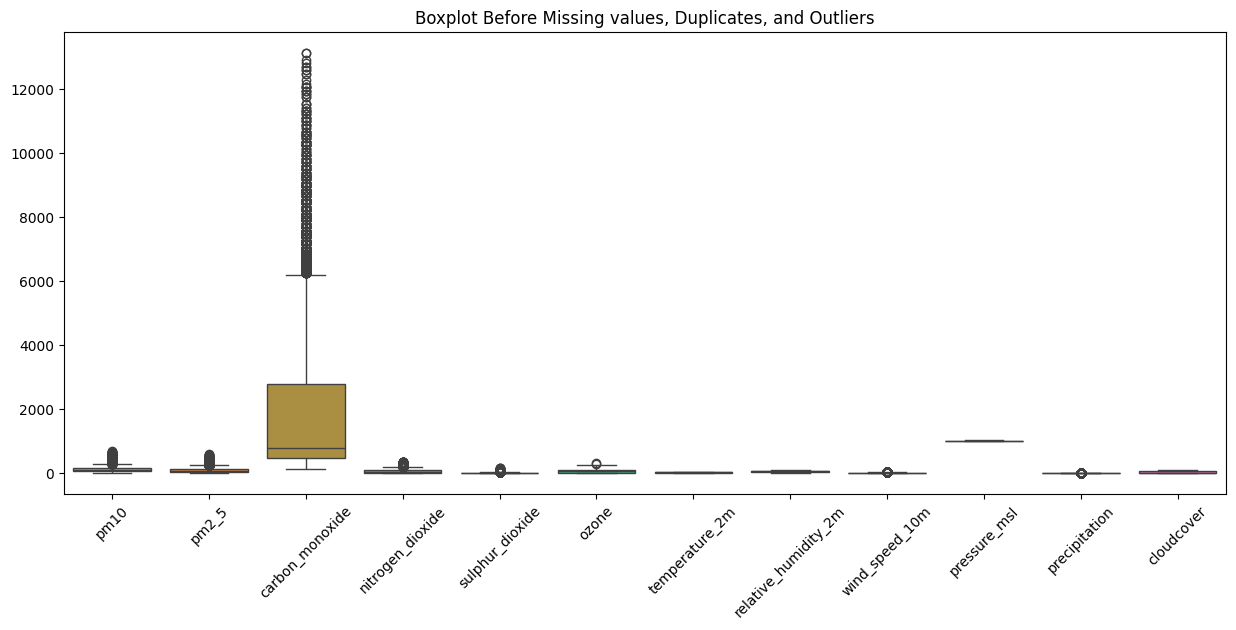

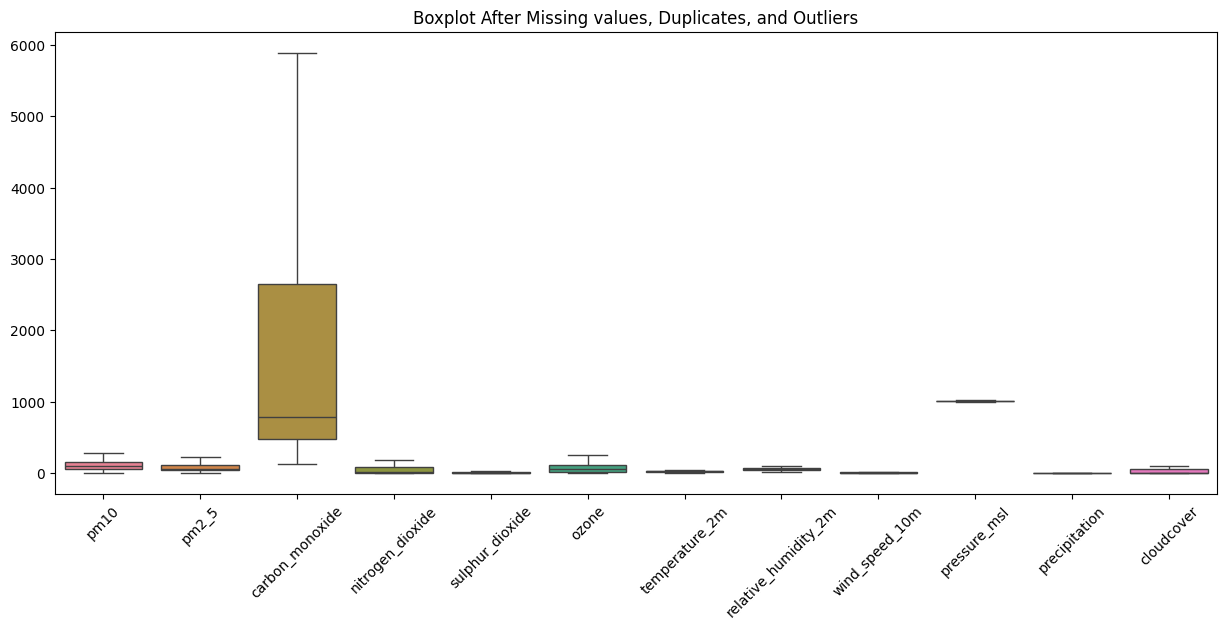

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Automatically detect numeric columns
numeric_cols = df_new.select_dtypes(include='number').columns.tolist()
print("Numeric columns:", numeric_cols)

# 2️⃣ Boxplot function to compare before and after
def plot_before_after(df_before, df_after, cols, title_before, title_after):
    plt.figure(figsize=(15,6))
    sns.boxplot(data=df_before[cols])
    plt.title(title_before)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(15,6))
    sns.boxplot(data=df_after[cols])
    plt.title(title_after)
    plt.xticks(rotation=45)
    plt.show()

# 3️⃣ Example: df_before = original data before handling, df_after = df_new after all cleaning
plot_before_after(
    df_before=df,  # store a copy of original df before cleaning
    df_after=df_new,
    cols=numeric_cols,
    title_before="Boxplot Before Missing values, Duplicates, and Outliers",
    title_after="Boxplot After Missing values, Duplicates, and Outliers"
)


Skewness of numeric columns:
 pm10                    0.993366
pm2_5                   1.105175
carbon_monoxide         1.219589
nitrogen_dioxide        1.188180
sulphur_dioxide         1.142406
ozone                   0.307734
temperature_2m         -0.141810
relative_humidity_2m   -0.072320
wind_speed_10m          0.598279
pressure_msl           -0.136618
precipitation           0.000000
cloudcover              0.943348
dtype: float64


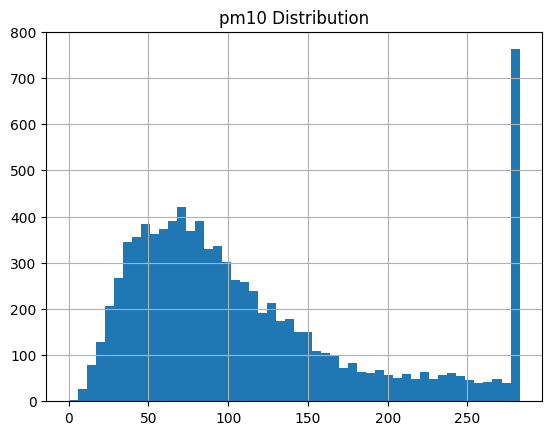

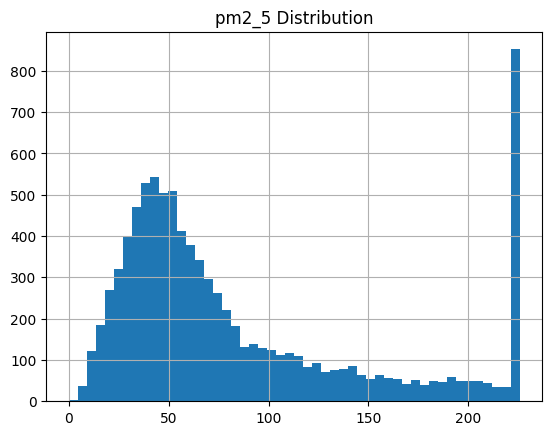

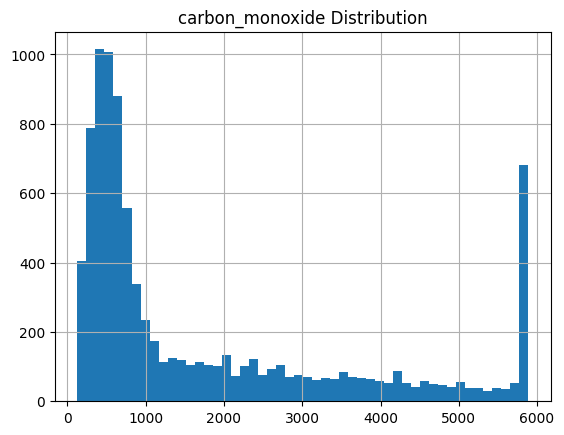

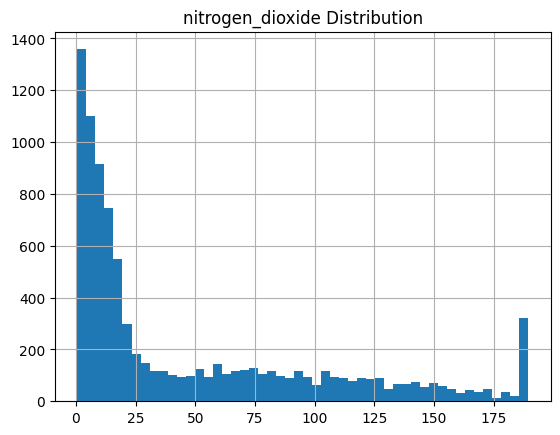

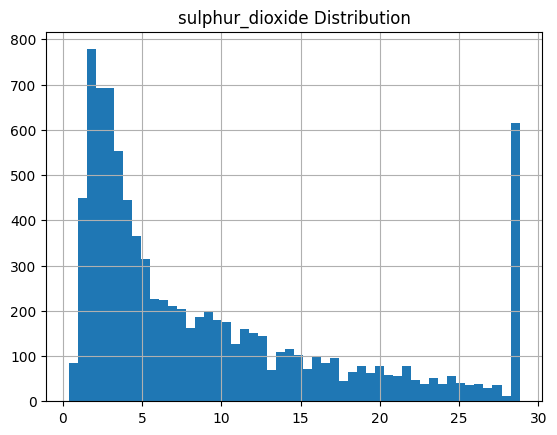

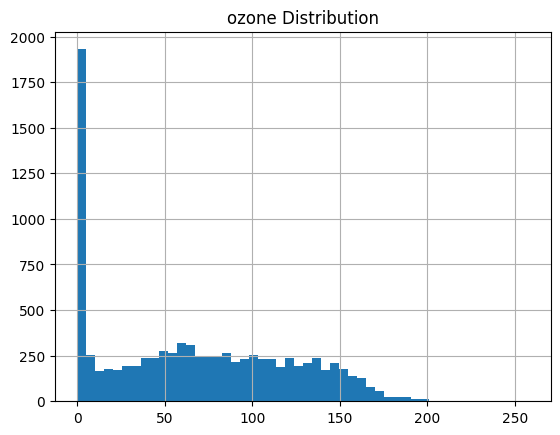

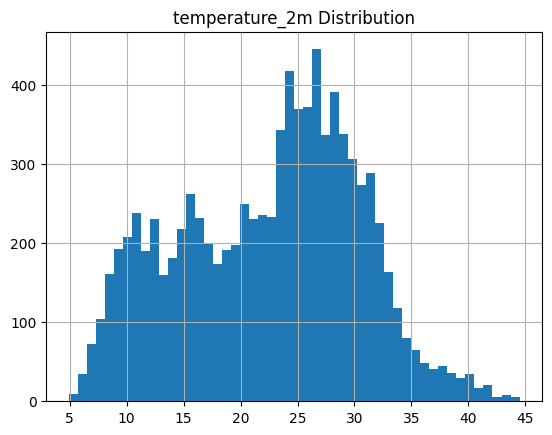

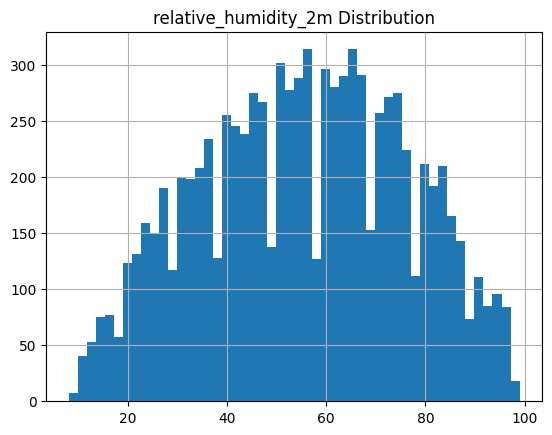

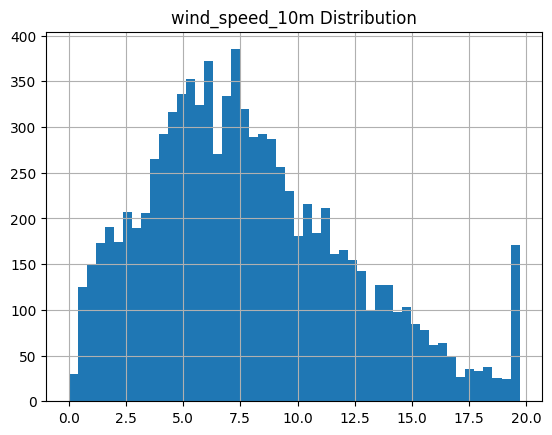

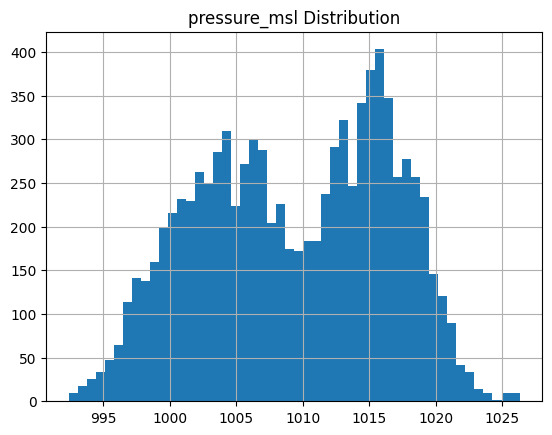

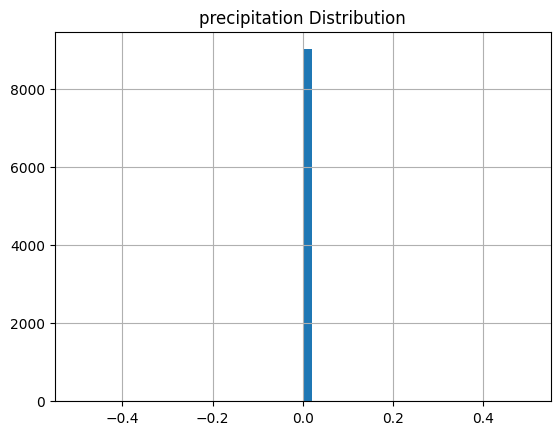

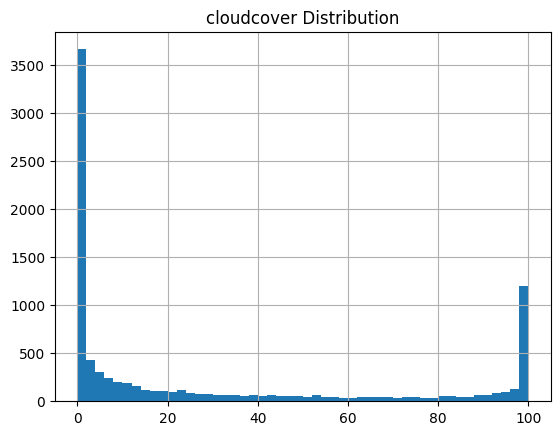

In [22]:
numeric_cols = df_new.select_dtypes(include='number').columns

# Calculate skewness
skew_values = df_new[numeric_cols].skew()
print("Skewness of numeric columns:\n", skew_values)

# Optional: visualize with histograms
import matplotlib.pyplot as plt
for col in numeric_cols:
    plt.figure()
    df_new[col].hist(bins=50)
    plt.title(f"{col} Distribution")
    plt.show()

In [23]:
import numpy as np

# List of positively skewed columns to transform
skewed_cols = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide',
               'sulphur_dioxide','wind_speed_10m','cloudcover']

# Apply log1p (log(1+x)) and create new columns with 'log_' prefix
for col in skewed_cols:
    df_new['log_' + col] = np.log1p(df_new[col])

# Verify by checking first 5 rows of new log columns
log_cols = ['log_' + col for col in skewed_cols]
df_new[log_cols].head()


,log_pm10,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover
0,4.999709,4.815998,8.003604,4.545632,2.090629,2.116256,0.0
1,4.921804,4.742582,7.796042,4.379899,1.948763,2.028148,0.0
2,4.816565,4.633660,7.575744,4.058545,1.832581,2.208274,0.0
3,4.662117,4.467975,7.345862,3.682107,1.720979,2.230014,0.0
4,4.527857,4.318021,7.177355,3.428164,1.619388,2.219203,0.0


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/full_merged_features.csv")

# Display basic info
print("✅ Data Loaded | Shape:", df.shape)
df.head()


✅ Data Loaded | Shape: (9390, 16)


,time,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover,day_of_week,month
0,2024-10-01 00:00:00,147.37,122.47,2990.72,NaN,93.22,7.09,0.31,24.6,73.0,7.3,1007.3,0.0,0.0,Tuesday,October
1,2024-10-01 01:00:00,136.25,113.73,2429.96,NaN,78.83,6.02,4.60,23.3,77.0,6.6,1006.8,0.0,0.0,Tuesday,October
2,2024-10-01 02:00:00,122.54,101.89,1949.31,NaN,56.89,5.25,21.64,23.5,71.0,8.1,1006.0,0.0,0.0,Tuesday,October
3,2024-10-01 03:00:00,104.86,86.18,1548.77,NaN,38.73,4.59,38.27,24.0,66.0,8.3,1005.8,0.0,0.0,Tuesday,October
4,2024-10-01 04:00:00,91.56,74.04,1308.44,NaN,29.82,4.05,37.55,23.8,67.0,8.2,1005.8,0.0,0.0,Tuesday,October


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  9390 non-null   object 
 1   pm10                  9150 non-null   float64
 2   pm2_5                 9150 non-null   float64
 3   carbon_monoxide       9150 non-null   float64
 4   carbon_dioxide        0 non-null      float64
 5   nitrogen_dioxide      9150 non-null   float64
 6   sulphur_dioxide       9150 non-null   float64
 7   ozone                 9150 non-null   float64
 8   temperature_2m        9389 non-null   float64
 9   relative_humidity_2m  9389 non-null   float64
 10  wind_speed_10m        9389 non-null   float64
 11  pressure_msl          9389 non-null   float64
 12  precipitation         9389 non-null   float64
 13  cloudcover            9389 non-null   float64
 14  day_of_week           9389 non-null   object 
 15  month                

In [ ]:
df.describe()

,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover
count,9150.000000,9150.000000,9150.000000,0.0,9150.000000,9150.000000,9150.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000
mean,124.242011,94.833367,1939.401493,NaN,50.665531,10.353287,66.788718,22.450847,55.579082,7.931984,1009.365555,0.127852,29.515603
std,97.638266,84.942613,2234.599844,NaN,60.883487,12.099656,54.081129,7.919860,20.801460,4.593184,7.061181,0.758726,38.228019
min,0.000000,0.000000,127.580000,NaN,0.630000,0.370000,0.000000,4.900000,8.000000,0.000000,992.400000,0.000000,0.000000
25%,58.732500,40.020000,480.537500,NaN,7.482500,2.800000,9.465000,15.800000,39.000000,4.600000,1003.600000,0.000000,0.000000
50%,93.595000,61.720000,767.710000,NaN,17.990000,5.780000,62.960000,23.800000,56.000000,7.200000,1009.800000,0.000000,6.000000
75%,151.620000,118.437500,2777.100000,NaN,83.630000,13.590000,110.150000,28.300000,72.000000,10.600000,1015.400000,0.000000,58.000000
max,694.730000,602.050000,13137.820000,NaN,356.440000,164.030000,306.130000,44.500000,99.000000,33.100000,1026.300000,14.400000,100.000000


In [ ]:
df_new = df.copy()
df_new = df_new.drop(columns=['carbon_dioxide'])

In [ ]:
df_new.shape

(9390, 15)

Check Duplicates 

In [ ]:
duplicate_counts = df_new.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)

time                     365
pm10                    2184
pm2_5                   2690
carbon_monoxide         4698
nitrogen_dioxide        7266
sulphur_dioxide         8368
ozone                   4987
temperature_2m          9003
relative_humidity_2m    9297
wind_speed_10m          9129
pressure_msl            9064
precipitation           9302
cloudcover              9288
day_of_week             9382
month                   9377
dtype: int64


In [ ]:
df_new[df_new.duplicated(keep=False)]

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover,day_of_week,month
24,2024-10-02 00:00:00,310.45,245.60,8010.86,260.47,38.62,0.00,30.1,31.0,1.9,1005.4,0.0,0.0,Wednesday,October
25,2024-10-02 00:00:00,310.45,245.60,8010.86,260.47,38.62,0.00,30.1,31.0,1.9,1005.4,0.0,0.0,Wednesday,October
49,2024-10-03 00:00:00,206.74,154.50,4432.68,117.90,13.83,0.00,24.1,61.0,10.6,1004.6,0.0,0.0,Thursday,October
50,2024-10-03 00:00:00,206.74,154.50,4432.68,117.90,13.83,0.00,24.1,61.0,10.6,1004.6,0.0,0.0,Thursday,October
74,2024-10-04 00:00:00,221.39,166.77,6088.26,202.89,35.76,0.00,26.8,58.0,7.4,1004.6,0.0,0.0,Friday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,2025-10-08 00:00:00,51.56,26.33,590.40,16.94,2.02,51.33,16.3,78.0,3.1,1013.8,0.0,0.0,Wednesday,October
9314,2025-10-09 00:00:00,51.50,25.10,567.97,13.72,1.08,43.29,19.3,67.0,4.8,1013.4,0.0,0.0,Thursday,October
9315,2025-10-09 00:00:00,51.50,25.10,567.97,13.72,1.08,43.29,19.3,67.0,4.8,1013.4,0.0,0.0,Thursday,October
9364,2025-10-11 00:00:00,142.36,61.18,632.61,15.58,2.25,60.02,20.3,53.0,5.0,1012.6,0.0,0.0,Saturday,October


In [ ]:
df_new.drop_duplicates(inplace=True)

In [ ]:
print(df_new.duplicated().sum())

0


In [ ]:
df_new.shape


(9026, 15)

In [ ]:
df_new.describe()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover
count,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000,9025.000000,9025.000000,9025.000000,9025.000000,9025.000000,9025.000000
mean,123.001599,93.865705,1913.999266,49.809595,10.366691,67.859915,22.526537,55.438892,7.950737,1009.359524,0.124576,29.524321
std,96.569146,84.097909,2217.439360,60.319590,12.147508,54.352498,7.940925,20.786461,4.579430,7.065968,0.733420,38.182833
min,0.000000,0.000000,127.580000,0.630000,0.370000,0.000000,4.900000,8.000000,0.000000,992.400000,0.000000,0.000000
25%,58.290000,39.762500,474.847500,7.230000,2.792500,10.752500,15.900000,39.000000,4.700000,1003.500000,0.000000,0.000000
50%,92.860000,61.370000,761.030000,17.610000,5.770000,63.810000,23.900000,56.000000,7.300000,1009.800000,0.000000,7.000000
75%,150.235000,116.565000,2723.690000,81.570000,13.590000,111.767500,28.400000,72.000000,10.700000,1015.400000,0.000000,58.000000
max,694.730000,602.050000,13137.820000,356.440000,164.030000,306.130000,44.500000,99.000000,33.100000,1026.300000,14.400000,100.000000


Missing Values 

In [ ]:
df_new.isnull().sum()

time                      0
pm10                    240
pm2_5                   240
carbon_monoxide         240
nitrogen_dioxide        240
sulphur_dioxide         240
ozone                   240
temperature_2m            1
relative_humidity_2m      1
wind_speed_10m            1
pressure_msl              1
precipitation             1
cloudcover                1
day_of_week               1
month                     1
dtype: int64

In [ ]:
# Columns with moderate missing values
cols_medium_missing = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide','sulphur_dioxide','ozone']

for col in cols_medium_missing:
    # Linear interpolation (fills gaps in the middle)
    df_new[col] = df_new[col].interpolate(method='linear')
    
    # Fill start if first value is NaN
    if pd.isna(df_new[col].iloc[0]):
        df_new[col].iloc[0] = df_new[col].median()
    
    # Fill end if last value is NaN
    if pd.isna(df_new[col].iloc[-1]):
        df_new[col].iloc[-1] = df_new[col].median()

# Verify missing values are handled
print("Missing values after cleaning:")
print(df_new[cols_medium_missing].isnull().sum())


Missing values after cleaning:
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
dtype: int64


In [ ]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover,day_of_week,month
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,1007.3,0.0,0.0,Tuesday,October
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,1006.8,0.0,0.0,Tuesday,October
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,1006.0,0.0,0.0,Tuesday,October
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,1005.8,0.0,0.0,Tuesday,October
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,1005.8,0.0,0.0,Tuesday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,1012.7,0.0,0.0,Saturday,October
9386,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,1012.8,0.0,0.0,Saturday,October
9387,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,1012.7,0.0,0.0,Saturday,October
9388,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,1012.5,0.0,0.0,Saturday,October


In [ ]:
cols_numeric_min_missing = ['temperature_2m','relative_humidity_2m','wind_speed_10m',
                            'pressure_msl','precipitation','cloudcover']

for col in cols_numeric_min_missing:
    df_new[col] = df_new[col].fillna(df_new[col].median())

# Verify
print("Missing values after cleaning numeric minimal-missing columns:")
print(df_new[cols_numeric_min_missing].isnull().sum())


Missing values after cleaning numeric minimal-missing columns:
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
pressure_msl            0
precipitation           0
cloudcover              0
dtype: int64


In [ ]:
# Fill missing categorical values
df_new['day_of_week'] = df_new['day_of_week'].fillna('Sunday')
df_new['month'] = df_new['month'].fillna('October')

# Verify
print(df_new[['day_of_week', 'month']].isnull().sum())


day_of_week    0
month          0
dtype: int64


In [ ]:
df_new.isnull().sum().sum()

np.int64(0)

In [ ]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover,day_of_week,month
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,1007.3,0.0,0.0,Tuesday,October
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,1006.8,0.0,0.0,Tuesday,October
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,1006.0,0.0,0.0,Tuesday,October
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,1005.8,0.0,0.0,Tuesday,October
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,1005.8,0.0,0.0,Tuesday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,1012.7,0.0,0.0,Saturday,October
9386,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,1012.8,0.0,0.0,Saturday,October
9387,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,1012.7,0.0,0.0,Saturday,October
9388,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,1012.5,0.0,0.0,Saturday,October


Detect and  remove Outliers 

In [ ]:
# List of numeric columns
cols_numeric = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide',
                'sulphur_dioxide','ozone','temperature_2m','relative_humidity_2m',
                'wind_speed_10m','pressure_msl','precipitation','cloudcover']

# Detect & cap outliers using IQR method
for col in cols_numeric:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap values at lower and upper bounds
    df_new[col] = df_new[col].clip(lower, upper)

# Optional: check that no extreme outliers remain
for col in cols_numeric:
    print(f"{col} min: {df_new[col].min()}, max: {df_new[col].max()}")


pm10 min: 0.0, max: 282.63250000000005
pm2_5 min: 0.0, max: 225.57875
carbon_monoxide min: 127.58, max: 5888.168750000001
nitrogen_dioxide min: 0.63, max: 189.445
sulphur_dioxide min: 0.37, max: 28.815
ozone min: 0.0, max: 257.815
temperature_2m min: 4.9, max: 44.5
relative_humidity_2m min: 8.0, max: 99.0
wind_speed_10m min: 0.0, max: 19.699999999999996
pressure_msl min: 992.4, max: 1026.3
precipitation min: 0.0, max: 0.0
cloudcover min: 0.0, max: 100.0


In [ ]:
df_new.describe()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,precipitation,cloudcover
count,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.000000,9026.0,9026.000000
mean,114.598248,85.838229,1757.637392,47.966721,9.238593,67.453558,22.526690,55.438954,7.900454,1009.359572,0.0,29.521826
std,76.103793,63.900804,1796.557968,54.426169,8.263728,53.790529,7.940499,20.785310,4.417013,7.065578,0.0,38.181454
min,0.000000,0.000000,127.580000,0.630000,0.370000,0.000000,4.900000,8.000000,0.000000,992.400000,0.0,0.000000
25%,58.120000,39.960000,480.537500,7.370000,2.840000,12.340000,15.900000,39.000000,4.700000,1003.525000,0.0,0.000000
50%,91.720000,61.122975,781.060000,18.275000,5.840000,62.980000,23.900000,56.000000,7.300000,1009.800000,0.0,7.000000
75%,147.925000,114.207500,2643.590000,80.200000,13.230000,110.530000,28.400000,72.000000,10.700000,1015.400000,0.0,58.000000
max,282.632500,225.578750,5888.168750,189.445000,28.815000,257.815000,44.500000,99.000000,19.700000,1026.300000,0.0,100.000000


Numeric columns: ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover']


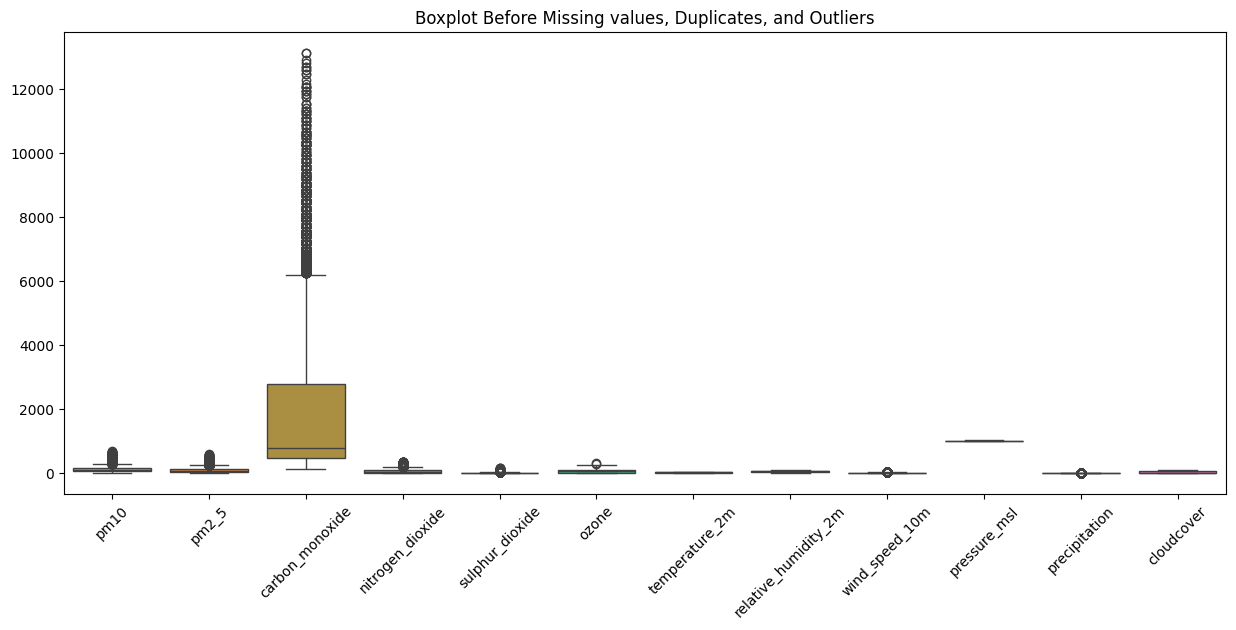

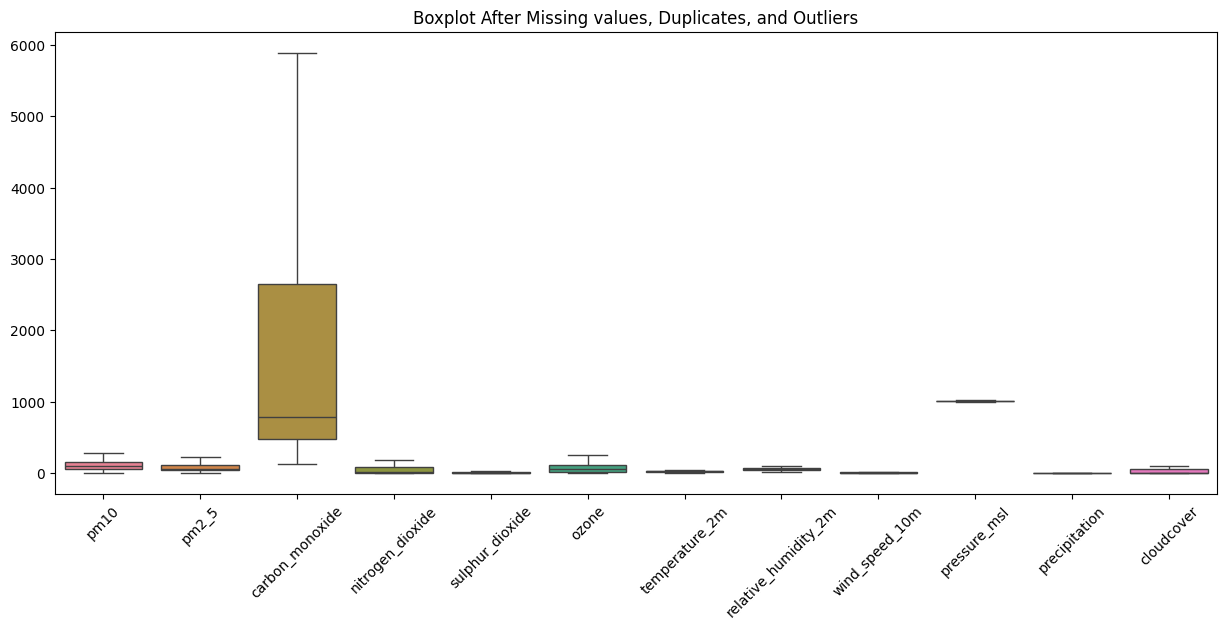

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Automatically detect numeric columns
numeric_cols = df_new.select_dtypes(include='number').columns.tolist()
print("Numeric columns:", numeric_cols)

# 2️⃣ Boxplot function to compare before and after
def plot_before_after(df_before, df_after, cols, title_before, title_after):
    plt.figure(figsize=(15,6))
    sns.boxplot(data=df_before[cols])
    plt.title(title_before)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(15,6))
    sns.boxplot(data=df_after[cols])
    plt.title(title_after)
    plt.xticks(rotation=45)
    plt.show()

# 3️⃣ Example: df_before = original data before handling, df_after = df_new after all cleaning
plot_before_after(
    df_before=df,  # store a copy of original df before cleaning
    df_after=df_new,
    cols=numeric_cols,
    title_before="Boxplot Before Missing values, Duplicates, and Outliers",
    title_after="Boxplot After Missing values, Duplicates, and Outliers"
)


Skewness of numeric columns:
 pm10                    0.993366
pm2_5                   1.105175
carbon_monoxide         1.219589
nitrogen_dioxide        1.188180
sulphur_dioxide         1.142406
ozone                   0.307734
temperature_2m         -0.141810
relative_humidity_2m   -0.072320
wind_speed_10m          0.598279
pressure_msl           -0.136618
precipitation           0.000000
cloudcover              0.943348
dtype: float64


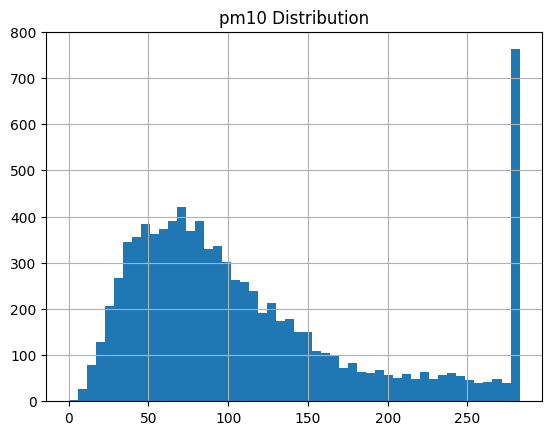

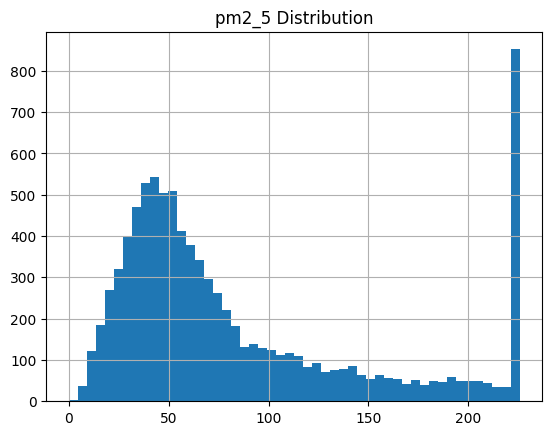

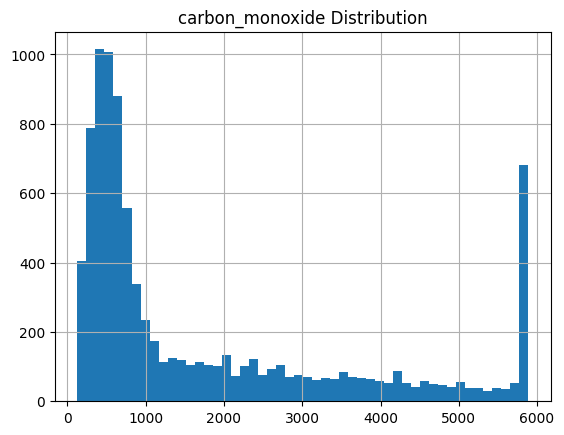

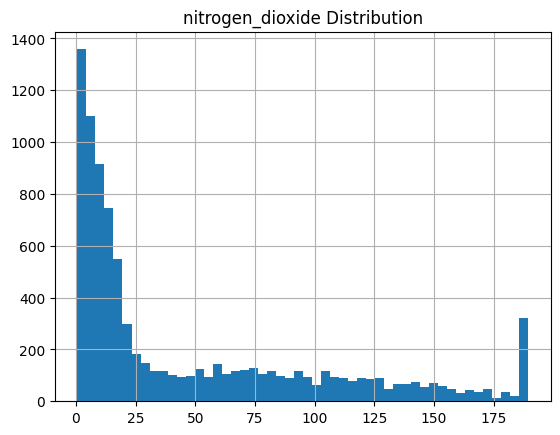

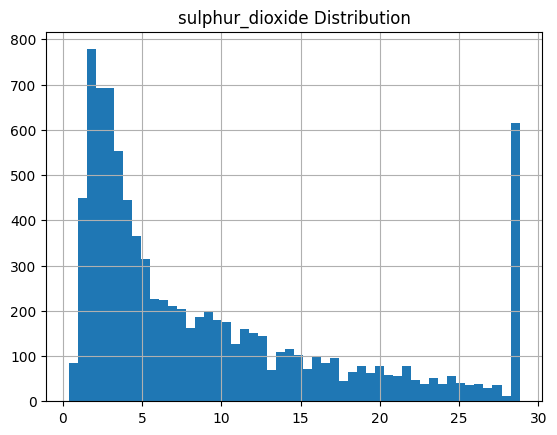

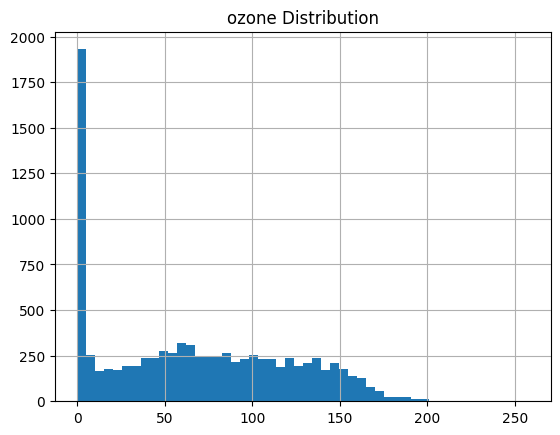

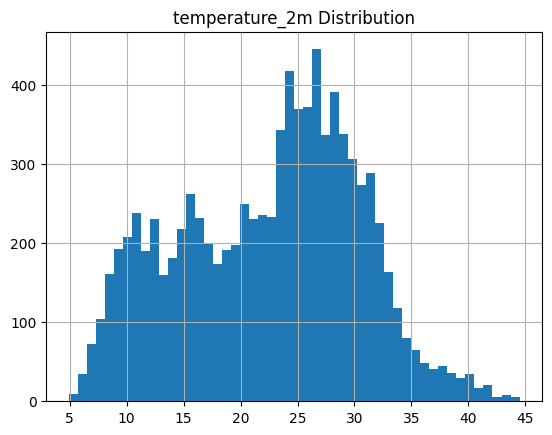

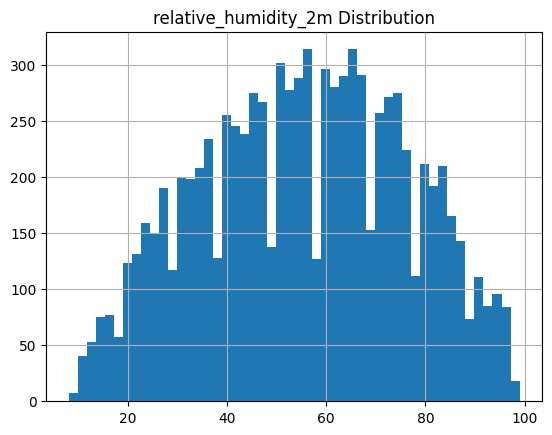

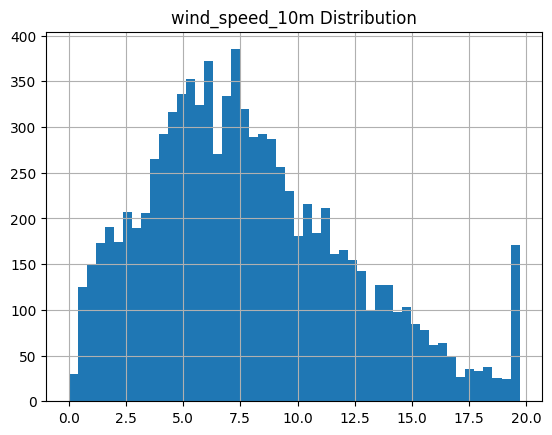

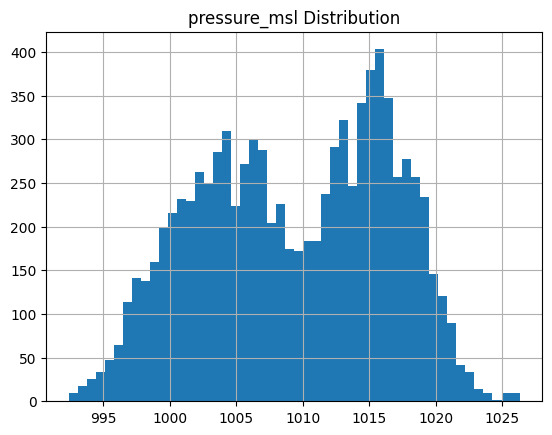

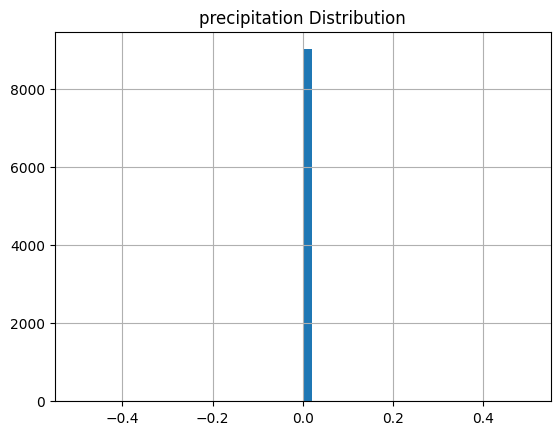

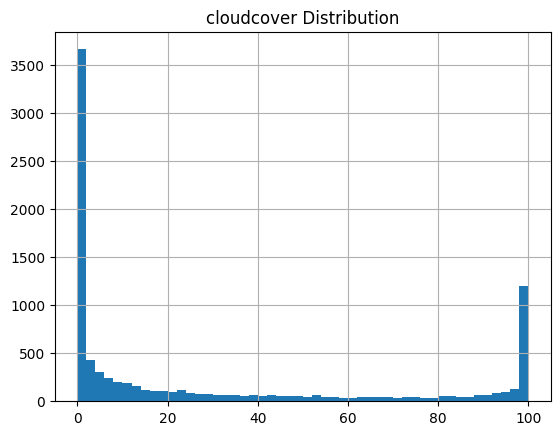

In [ ]:
numeric_cols = df_new.select_dtypes(include='number').columns

# Calculate skewness
skew_values = df_new[numeric_cols].skew()
print("Skewness of numeric columns:\n", skew_values)

# Optional: visualize with histograms
import matplotlib.pyplot as plt
for col in numeric_cols:
    plt.figure()
    df_new[col].hist(bins=50)
    plt.title(f"{col} Distribution")
    plt.show()

In [ ]:
import numpy as np

# List of positively skewed columns to transform
skewed_cols = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide',
               'sulphur_dioxide','wind_speed_10m','cloudcover']

# Apply log1p (log(1+x)) and create new columns with 'log_' prefix
for col in skewed_cols:
    df_new['log_' + col] = np.log1p(df_new[col])

# Verify by checking first 5 rows of new log columns
log_cols = ['log_' + col for col in skewed_cols]
df_new[log_cols].head()


,log_pm10,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover
0,4.999709,4.815998,8.003604,4.545632,2.090629,2.116256,0.0
1,4.921804,4.742582,7.796042,4.379899,1.948763,2.028148,0.0
2,4.816565,4.633660,7.575744,4.058545,1.832581,2.208274,0.0
3,4.662117,4.467975,7.345862,3.682107,1.720979,2.230014,0.0
4,4.527857,4.318021,7.177355,3.428164,1.619388,2.219203,0.0


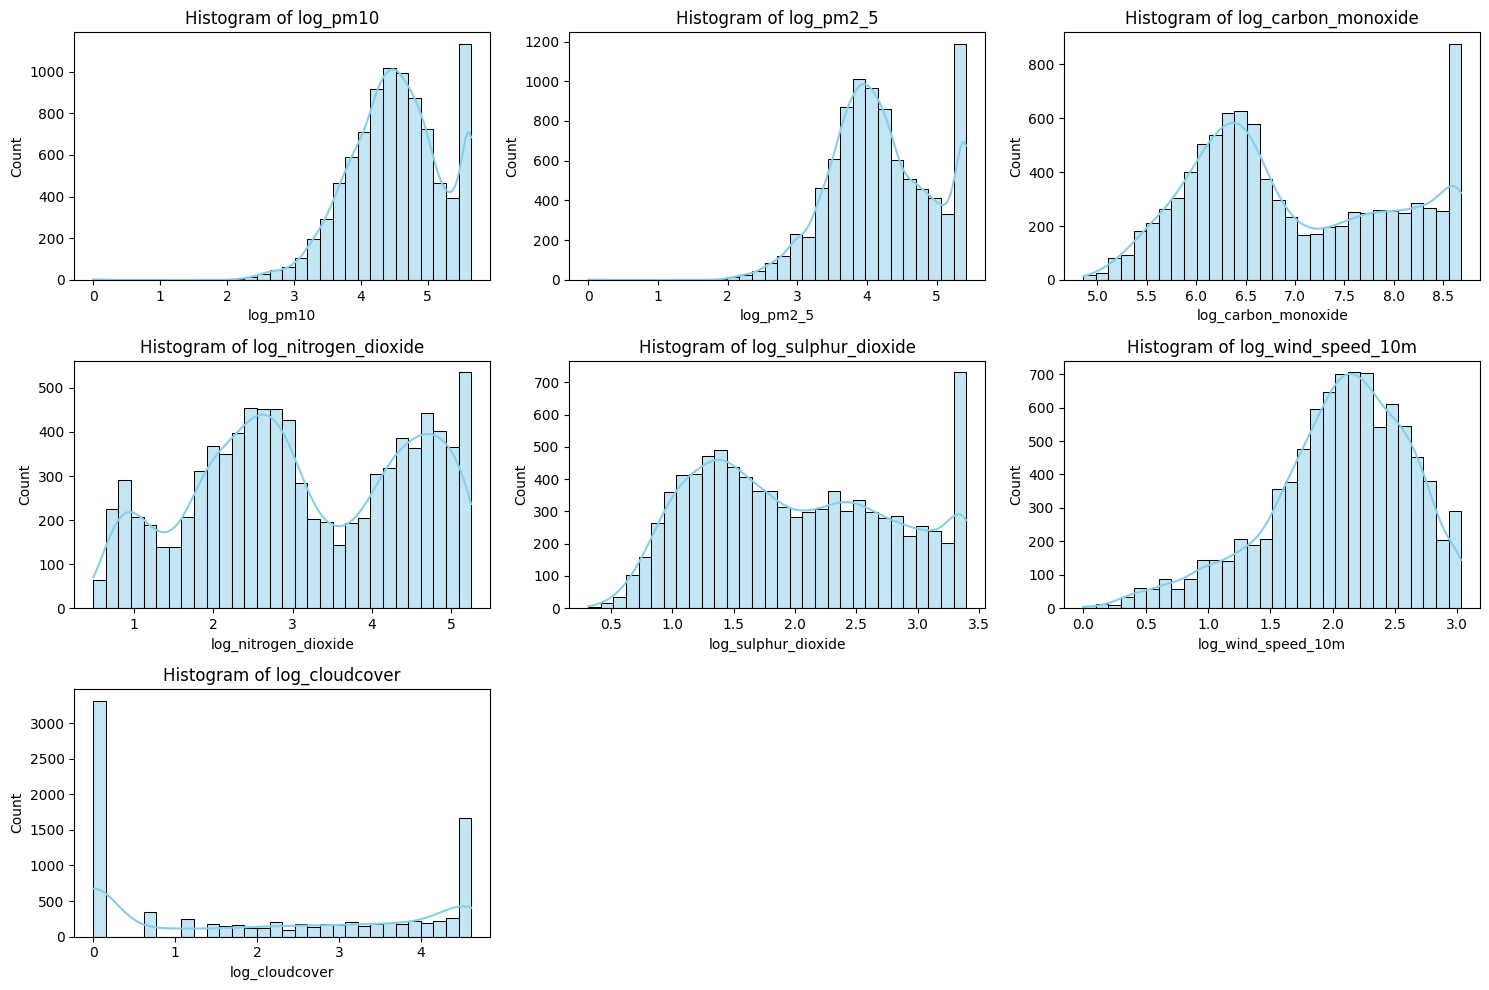

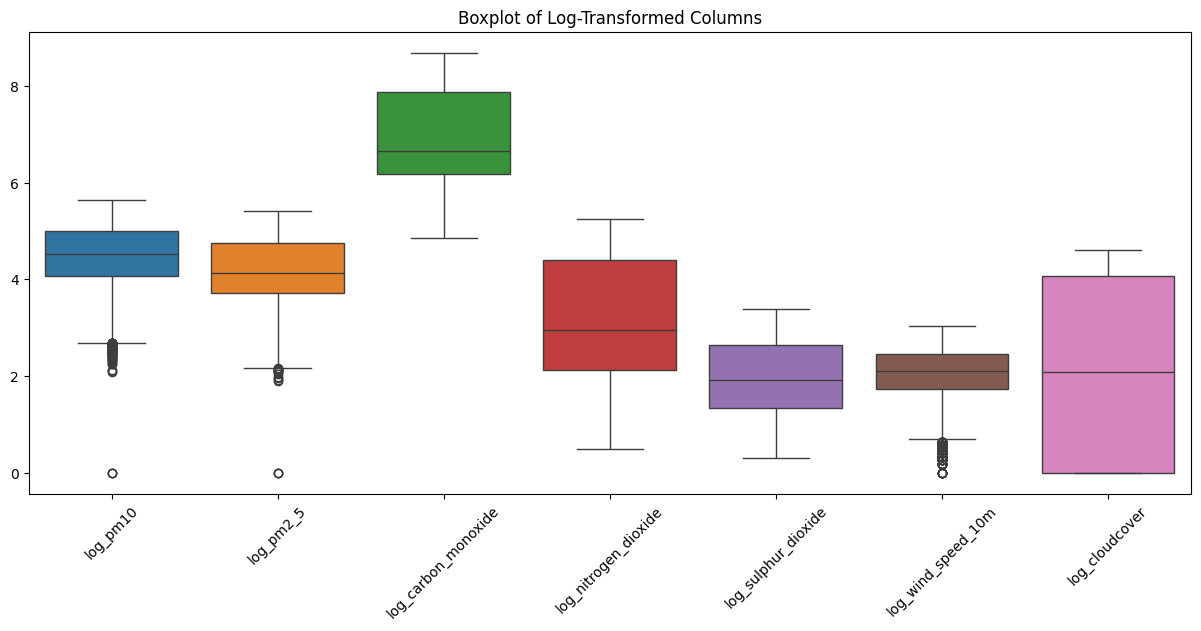

In [ ]:
# List of log-transformed columns
log_cols = ['log_pm10','log_pm2_5','log_carbon_monoxide','log_nitrogen_dioxide',
            'log_sulphur_dioxide','log_wind_speed_10m','log_cloudcover']

# 1️⃣ Histograms
plt.figure(figsize=(15,10))
for i, col in enumerate(log_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_new[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# 2️⃣ Boxplots
plt.figure(figsize=(15,6))
sns.boxplot(data=df_new[log_cols])
plt.title("Boxplot of Log-Transformed Columns")
plt.xticks(rotation=45)
plt.show()

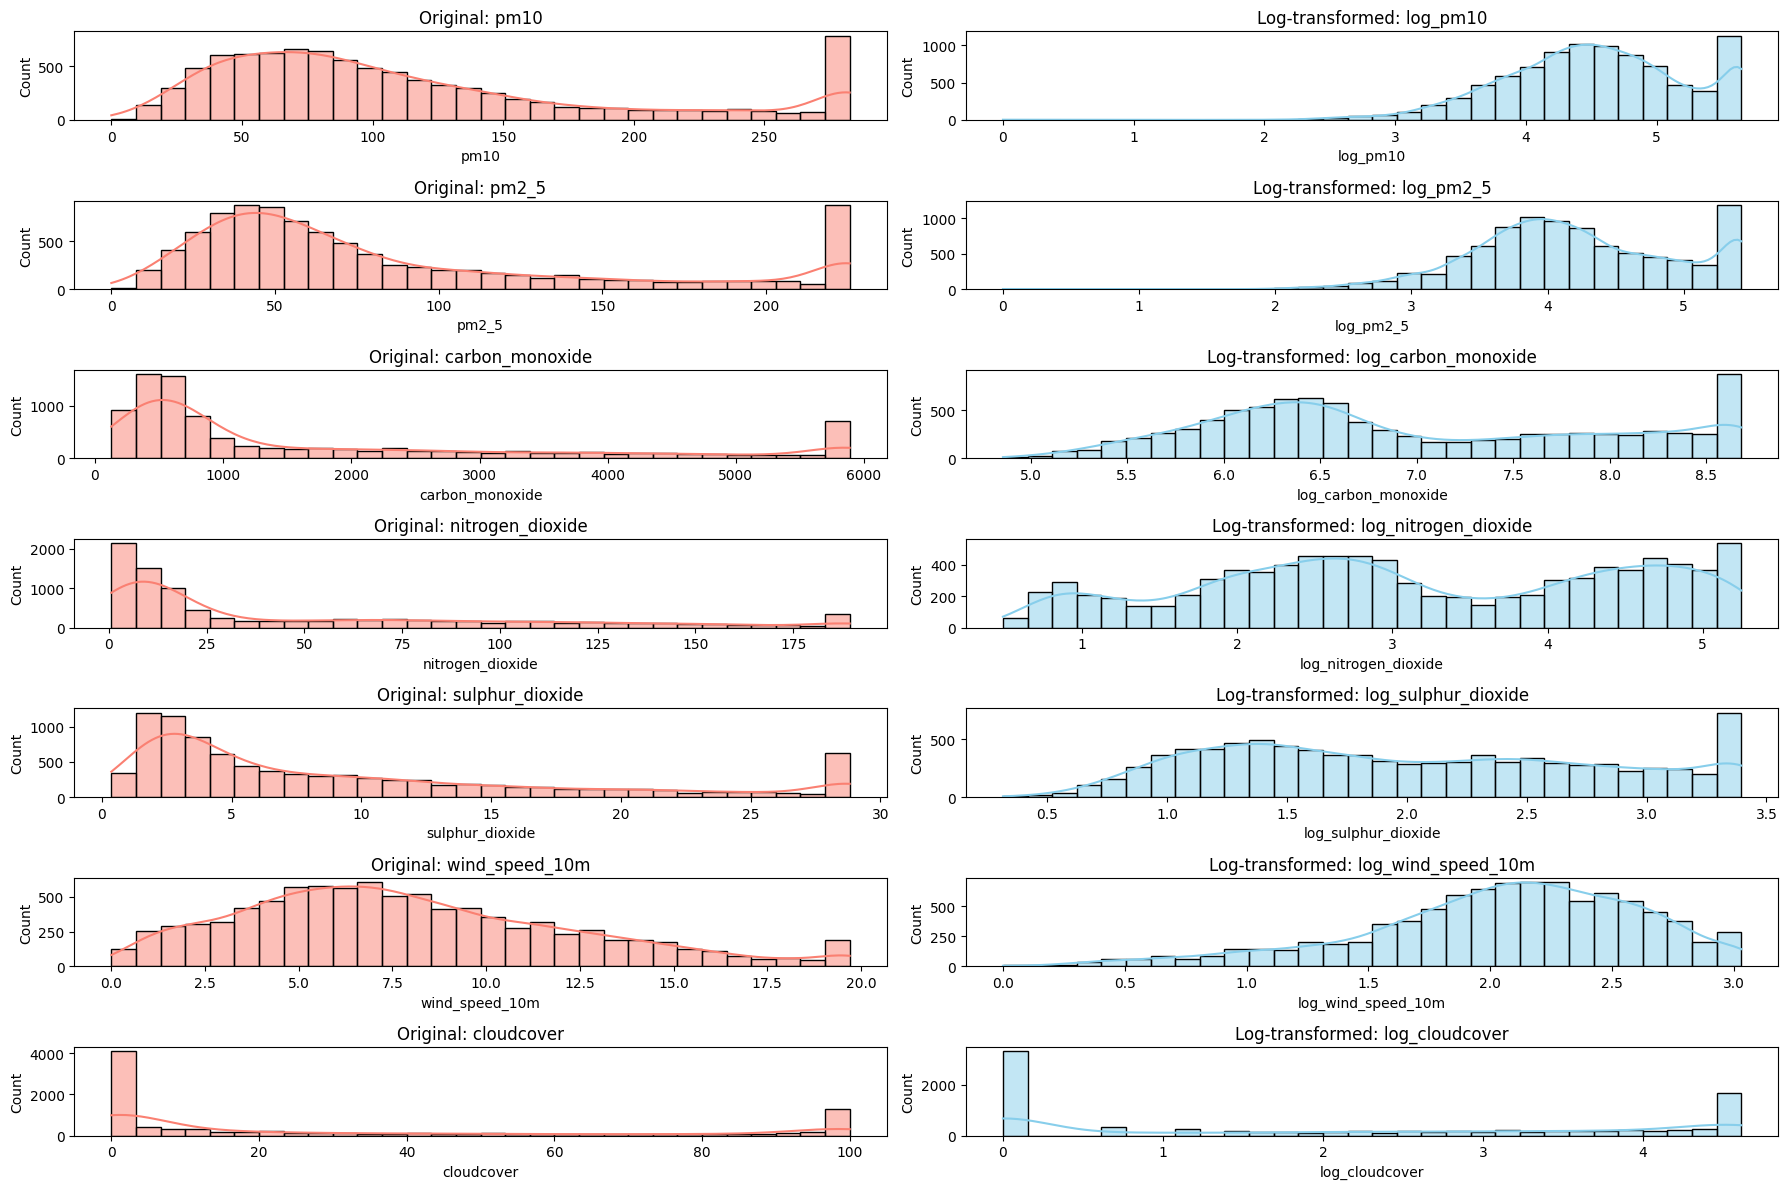

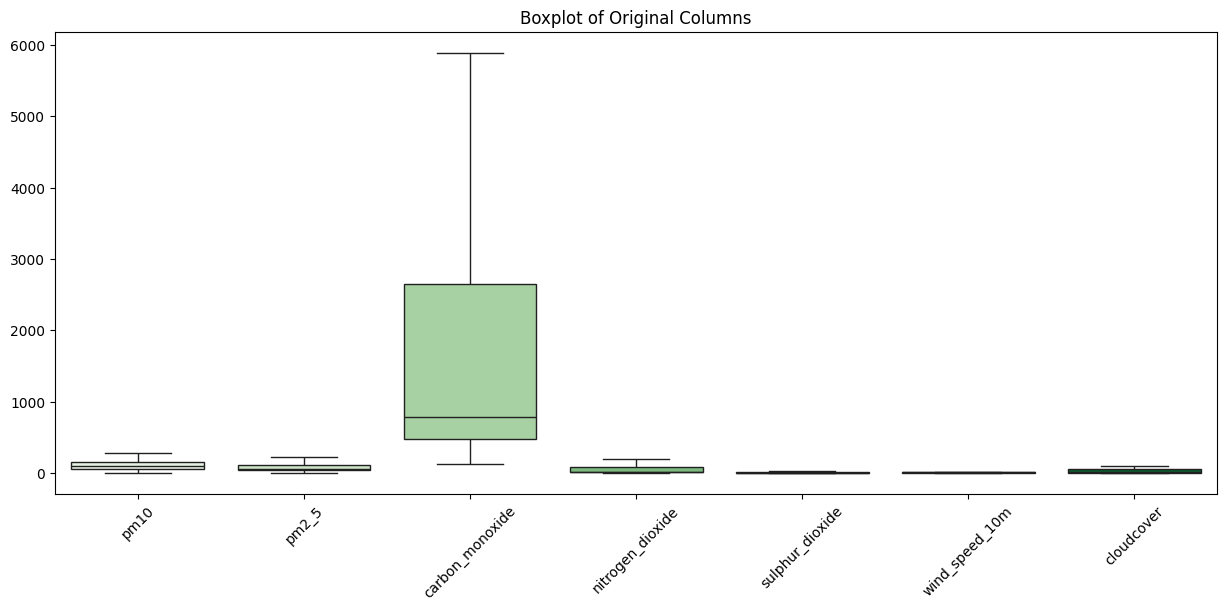

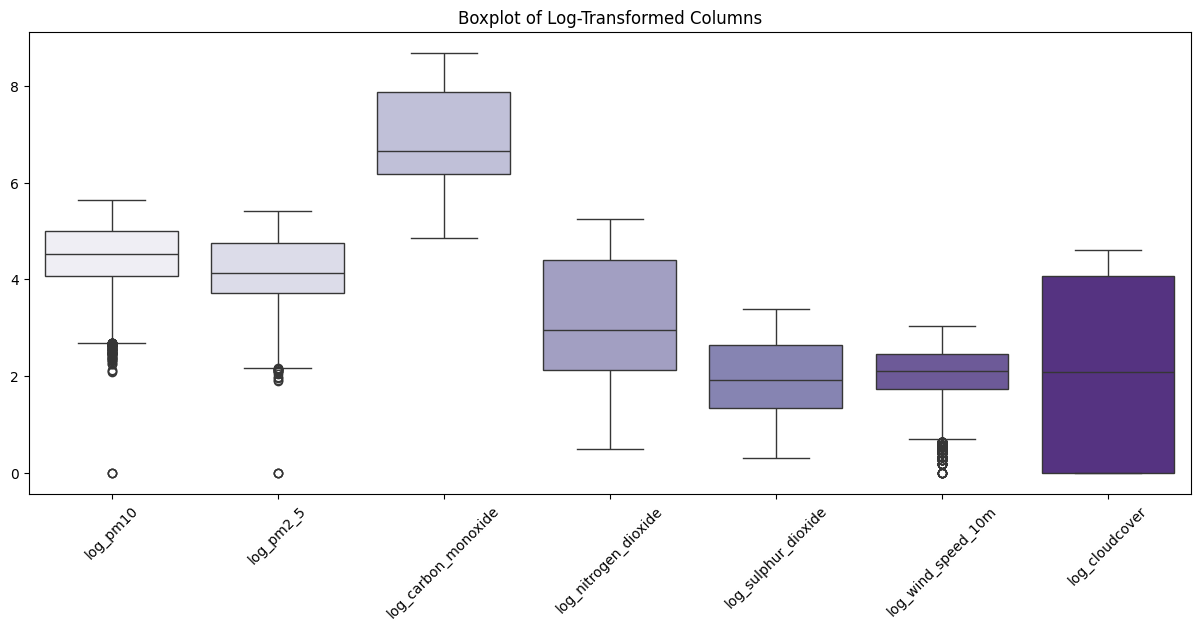

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original skewed columns (before log)
orig_cols = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide',
             'sulphur_dioxide','wind_speed_10m','cloudcover']

# Log-transformed columns
log_cols = ['log_pm10','log_pm2_5','log_carbon_monoxide','log_nitrogen_dioxide',
            'log_sulphur_dioxide','log_wind_speed_10m','log_cloudcover']

# 1️⃣ Histograms: Before vs After
plt.figure(figsize=(18,12))
for i, (orig, log) in enumerate(zip(orig_cols, log_cols), 1):
    # Original
    plt.subplot(7, 2, 2*i-1)
    sns.histplot(df_new[orig], kde=True, bins=30, color='salmon')
    plt.title(f'Original: {orig}')
    
    # Log-transformed
    plt.subplot(7, 2, 2*i)
    sns.histplot(df_new[log], kde=True, bins=30, color='skyblue')
    plt.title(f'Log-transformed: {log}')
    
plt.tight_layout()
plt.show()

# 2️⃣ Boxplots: Before vs After
plt.figure(figsize=(15,6))
sns.boxplot(data=df_new[orig_cols], palette="Greens")
plt.title("Boxplot of Original Columns")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(data=df_new[log_cols], palette="Purples")
plt.title("Boxplot of Log-Transformed Columns")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Columns
orig_cols = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide',
             'sulphur_dioxide','wind_speed_10m','cloudcover']
log_cols = ['log_pm10','log_pm2_5','log_carbon_monoxide','log_nitrogen_dioxide',
            'log_sulphur_dioxide','log_wind_speed_10m','log_cloudcover']

# Create summary table
skew_table = pd.DataFrame({
    'Column': orig_cols,
    'Skew_Before': [df_new[col].skew() for col in orig_cols],
    'Skew_After_Log': [df_new[col].skew() for col in log_cols]
})

# Round for better readability
skew_table = skew_table.round(3)

skew_table

,Column,Skew_Before,Skew_After_Log
0,pm10,0.993,-0.311
1,pm2_5,1.105,-0.044
2,carbon_monoxide,1.220,0.304
3,nitrogen_dioxide,1.188,-0.063
4,sulphur_dioxide,1.142,0.213
5,wind_speed_10m,0.598,-0.718
6,cloudcover,0.943,0.121


In [ ]:
df_new['day_of_week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [ ]:
df_new['month'].unique()

array(['October', 'November', 'December', 'January', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September'],
      dtype=object)

In [ ]:
df_new.dtypes

time                     object
pm10                    float64
pm2_5                   float64
carbon_monoxide         float64
nitrogen_dioxide        float64
sulphur_dioxide         float64
ozone                   float64
temperature_2m          float64
relative_humidity_2m    float64
wind_speed_10m          float64
pressure_msl            float64
precipitation           float64
cloudcover              float64
day_of_week              object
month                    object
log_pm10                float64
log_pm2_5               float64
log_carbon_monoxide     float64
log_nitrogen_dioxide    float64
log_sulphur_dioxide     float64
log_wind_speed_10m      float64
log_cloudcover          float64
dtype: object

In [ ]:
# List of log-transformed columns
log_cols = ['log_pm10','log_pm2_5','log_carbon_monoxide','log_nitrogen_dioxide',
            'log_sulphur_dioxide','log_wind_speed_10m','log_cloudcover']

# Round to 2 decimal places
df_new[log_cols] = df_new[log_cols].round(2)

# Verify
df_new[log_cols].head()


,log_pm10,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover
0,5.00,4.82,8.00,4.55,2.09,2.12,0.0
1,4.92,4.74,7.80,4.38,1.95,2.03,0.0
2,4.82,4.63,7.58,4.06,1.83,2.21,0.0
3,4.66,4.47,7.35,3.68,1.72,2.23,0.0
4,4.53,4.32,7.18,3.43,1.62,2.22,0.0


In [ ]:
# Create a copy for consistency checking
df_consistency = df_new.copy()

print("🔍 Feature Consistency Check Results\n")

# 1️⃣ Check for missing values
print("Missing values per column:")
print(df_consistency.isnull().sum())
print("\n")

# 2️⃣ Check for negative values in numeric columns
numeric_cols = df_consistency.select_dtypes(include='number').columns.tolist()
invalid_values = df_consistency[(df_consistency[numeric_cols] < 0).any(axis=1)]
print(f"Rows with negative numeric values: {invalid_values.shape[0]}")
print("\n")

# 3️⃣ Check time order (if 'time' column exists)
if 'time' in df_consistency.columns:
    print("Is 'time' column sorted?", df_consistency['time'].is_monotonic_increasing)
else:
    print("'time' column not found.")
print("\n")

# 4️⃣ Check categorical consistency for all object-type columns
cat_cols = df_consistency.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"Unique values in '{col}': {df_consistency[col].unique()}")
print("\n")

# 5️⃣ Numeric feature ranges and basic statistics
print("Statistical summary of numeric features:")
print(df_consistency[numeric_cols].describe())
print("\n")

# 6️⃣ Detect constant columns (no variation)
constant_cols = [col for col in df_consistency.columns if df_consistency[col].nunique() == 1]
if constant_cols:
    print("Columns with constant values (need checking):", constant_cols)
else:
    print("No constant columns found ✅")

print("\n✅ Full Feature Consistency Check Completed Successfully!")


🔍 Feature Consistency Check Results

Missing values per column:
time                    0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
sulphur_dioxide         0
ozone                   0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
pressure_msl            0
precipitation           0
cloudcover              0
day_of_week             0
month                   0
log_pm10                0
log_pm2_5               0
log_carbon_monoxide     0
log_nitrogen_dioxide    0
log_sulphur_dioxide     0
log_wind_speed_10m      0
log_cloudcover          0
dtype: int64


Rows with negative numeric values: 0


Is 'time' column sorted? True


Unique values in 'time': ['2024-10-01 00:00:00' '2024-10-01 01:00:00' '2024-10-01 02:00:00' ...
 '2025-10-11 22:00:00' '2025-10-11 23:00:00' '2025-10-12 00:00:00']
Unique values in 'day_of_week': ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
Unique va

In [ ]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,cloudcover,day_of_week,month,log_pm10,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,0.0,Tuesday,October,5.00,4.82,8.00,4.55,2.09,2.12,0.00
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,0.0,Tuesday,October,4.92,4.74,7.80,4.38,1.95,2.03,0.00
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,0.0,Tuesday,October,4.82,4.63,7.58,4.06,1.83,2.21,0.00
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,0.0,Tuesday,October,4.66,4.47,7.35,3.68,1.72,2.23,0.00
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,0.0,Tuesday,October,4.53,4.32,7.18,3.43,1.62,2.22,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,0.0,Saturday,October,4.69,3.92,6.18,2.71,1.26,1.93,0.00
9386,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,0.0,Saturday,October,4.73,3.96,6.23,2.74,1.21,1.86,0.00
9387,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,0.0,Saturday,October,4.77,4.01,6.27,2.74,1.17,1.93,0.00
9388,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,0.0,Saturday,October,4.81,4.06,6.30,2.74,1.14,1.96,0.00


In [ ]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover'],
      dtype='object')

                                                        Calculate AQI 

In [ ]:
def calculate_aqi(pm25, pm10):
    # Helper function for sub-index calculation
    def aqi_subindex(Cp, Bp_lo, Bp_hi, I_lo, I_hi):
        return ((I_hi - I_lo) / (Bp_hi - Bp_lo)) * (Cp - Bp_lo) + I_lo

    # PM2.5 breakpoints
    pm25_breakpoints = [
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 500.4, 301, 500)
    ]

    # PM10 breakpoints
    pm10_breakpoints = [
        (0, 54, 0, 50),
        (55, 154, 51, 100),
        (155, 254, 101, 150),
        (255, 354, 151, 200),
        (355, 424, 201, 300),
        (425, 604, 301, 500)
    ]

    # Compute AQI for PM2.5
    aqi_pm25 = None
    for Bp_lo, Bp_hi, I_lo, I_hi in pm25_breakpoints:
        if Bp_lo <= pm25 <= Bp_hi:
            aqi_pm25 = aqi_subindex(pm25, Bp_lo, Bp_hi, I_lo, I_hi)
            break

    # Compute AQI for PM10
    aqi_pm10 = None
    for Bp_lo, Bp_hi, I_lo, I_hi in pm10_breakpoints:
        if Bp_lo <= pm10 <= Bp_hi:
            aqi_pm10 = aqi_subindex(pm10, Bp_lo, Bp_hi, I_lo, I_hi)
            break

    # Final AQI = max of both (dominant pollutant)
    if aqi_pm25 is not None and aqi_pm10 is not None:
        return max(aqi_pm25, aqi_pm10)
    elif aqi_pm25 is not None:
        return aqi_pm25
    elif aqi_pm10 is not None:
        return aqi_pm10
    else:
        return None

# ✅ Apply it to your DataFrame
df_new["AQI"] = df_new.apply(lambda row: calculate_aqi(row["pm2_5"], row["pm10"]), axis=1)
print(df_new[["pm2_5", "pm10", "AQI"]].head())


    pm2_5    pm10         AQI
0  122.47  147.37  185.578820
1  113.73  136.25  181.066070
2  101.89  122.54  174.952687
3   86.18  104.86  166.841096
4   74.04   91.56  160.572813


In [ ]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI'],
      dtype='object')

In [ ]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,day_of_week,month,log_pm10,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover,AQI
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,Tuesday,October,5.00,4.82,8.00,4.55,2.09,2.12,0.00,185.578820
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,Tuesday,October,4.92,4.74,7.80,4.38,1.95,2.03,0.00,181.066070
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,Tuesday,October,4.82,4.63,7.58,4.06,1.83,2.21,0.00,174.952687
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,Tuesday,October,4.66,4.47,7.35,3.68,1.72,2.23,0.00,166.841096
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,Tuesday,October,4.53,4.32,7.18,3.43,1.62,2.22,0.00,160.572813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,Saturday,October,4.69,3.92,6.18,2.71,1.26,1.93,0.00,135.078392
9386,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,Saturday,October,4.73,3.96,6.23,2.74,1.21,1.86,0.00,140.864824
9387,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,Saturday,October,4.77,4.01,6.27,2.74,1.17,1.93,0.00,147.143719
9388,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,Saturday,October,4.81,4.06,6.30,2.74,1.14,1.96,0.00,151.660906


In [ ]:
df_new.isnull().sum()

time                    0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
sulphur_dioxide         0
ozone                   0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
pressure_msl            0
precipitation           0
cloudcover              0
day_of_week             0
month                   0
log_pm10                0
log_pm2_5               0
log_carbon_monoxide     0
log_nitrogen_dioxide    0
log_sulphur_dioxide     0
log_wind_speed_10m      0
log_cloudcover          0
AQI                     0
dtype: int64

In [ ]:
corr_with_aqi = df_new[['precipitation', 'AQI']].corr()
print(corr_with_aqi)

               precipitation  AQI
precipitation            NaN  NaN
AQI                      NaN  1.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


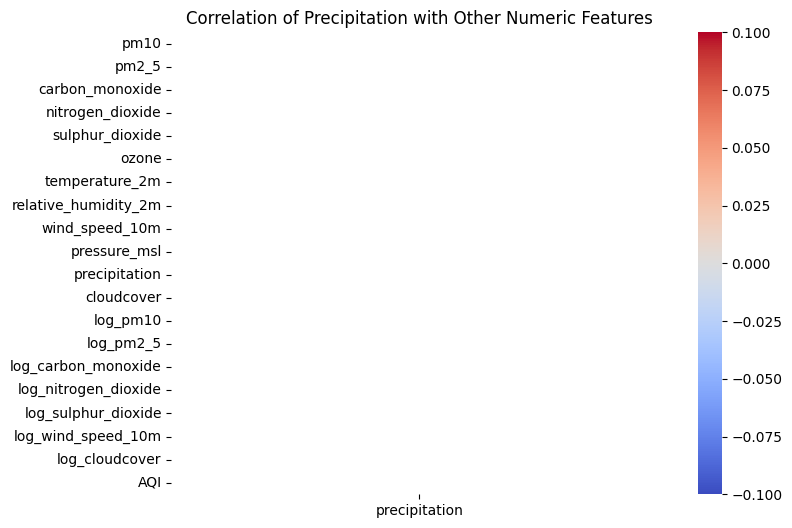

In [ ]:
import seaborn as sns

# Only select numeric columns
numeric_df = df_new.select_dtypes(include=['number'])

# Compute correlation
corr_precip = numeric_df.corr()[['precipitation']].sort_values(by='precipitation', ascending=False)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_precip, annot=True, cmap='coolwarm')
plt.title("Correlation of Precipitation with Other Numeric Features")
plt.show()


In [ ]:
# Check column data types and non-null counts
df_new.info()

# Check how many missing values remain in each column
df_new.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 9026 entries, 0 to 9389
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  9026 non-null   object 
 1   pm10                  9026 non-null   float64
 2   pm2_5                 9026 non-null   float64
 3   carbon_monoxide       9026 non-null   float64
 4   nitrogen_dioxide      9026 non-null   float64
 5   sulphur_dioxide       9026 non-null   float64
 6   ozone                 9026 non-null   float64
 7   temperature_2m        9026 non-null   float64
 8   relative_humidity_2m  9026 non-null   float64
 9   wind_speed_10m        9026 non-null   float64
 10  pressure_msl          9026 non-null   float64
 11  precipitation         9026 non-null   float64
 12  cloudcover            9026 non-null   float64
 13  day_of_week           9026 non-null   object 
 14  month                 9026 non-null   object 
 15  log_pm10              9026

time                    0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
sulphur_dioxide         0
ozone                   0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
pressure_msl            0
precipitation           0
cloudcover              0
day_of_week             0
month                   0
log_pm10                0
log_pm2_5               0
log_carbon_monoxide     0
log_nitrogen_dioxide    0
log_sulphur_dioxide     0
log_wind_speed_10m      0
log_cloudcover          0
AQI                     0
dtype: int64

                                                        Feature Enginnering 

⏰ Time-based feature

In [ ]:
# Ensure time column is in datetime format
df_new['time'] = pd.to_datetime(df_new['time'])

# Extract only required time-based features
df_new['hour'] = df_new['time'].dt.hour
df_new['day'] = df_new['time'].dt.day
df_new['month'] = df_new['time'].dt.month

print(df_new[['time', 'hour', 'day', 'month']].head())

                 time  hour  day  month
0 2024-10-01 00:00:00     0    1     10
1 2024-10-01 01:00:00     1    1     10
2 2024-10-01 02:00:00     2    1     10
3 2024-10-01 03:00:00     3    1     10
4 2024-10-01 04:00:00     4    1     10


In [ ]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI', 'hour', 'day'],
      dtype='object')

                                                    🔁 AQI change rate

In [ ]:
# Strip extra spaces from column names
df_new.columns = df_new.columns.str.strip()

# Ensure 'time' is datetime and sort
df_new['time'] = pd.to_datetime(df_new['time'])
df_new = df_new.sort_values('time').reset_index(drop=True)

# Compute AQI_change_rate and add as a new column
df_new['AQI_change_rate'] = df_new['AQI'].diff().fillna(0)

# ✅ Do NOT drop other columns
# Now your DataFrame keeps all original columns + AQI_change_rate
print(df_new.head(10))

                 time    pm10   pm2_5  carbon_monoxide  nitrogen_dioxide  \
0 2024-10-01 00:00:00  147.37  122.47          2990.72             93.22   
1 2024-10-01 01:00:00  136.25  113.73          2429.96             78.83   
2 2024-10-01 02:00:00  122.54  101.89          1949.31             56.89   
3 2024-10-01 03:00:00  104.86   86.18          1548.77             38.73   
4 2024-10-01 04:00:00   91.56   74.04          1308.44             29.82   
5 2024-10-01 05:00:00   82.93   65.99          1214.98             28.10   
6 2024-10-01 06:00:00   79.13   61.37          1308.44             34.96   
7 2024-10-01 07:00:00   87.57   66.54          1895.90             47.98   
8 2024-10-01 08:00:00   99.89   75.60          2803.80             56.21   
9 2024-10-01 09:00:00   93.55   69.95          2696.99             66.49   

   sulphur_dioxide  ozone  temperature_2m  relative_humidity_2m  \
0             7.09   0.31            24.6                  73.0   
1             6.02   4.60    

In [ ]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI', 'hour', 'day', 'AQI_change_rate'],
      dtype='object')

In [ ]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover,AQI,hour,day,AQI_change_rate
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,4.82,8.00,4.55,2.09,2.12,0.00,185.578820,0,1,0.000000
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,4.74,7.80,4.38,1.95,2.03,0.00,181.066070,1,1,-4.512750
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,4.63,7.58,4.06,1.83,2.21,0.00,174.952687,2,1,-6.113383
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,4.47,7.35,3.68,1.72,2.23,0.00,166.841096,3,1,-8.111591
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,4.32,7.18,3.43,1.62,2.22,0.00,160.572813,4,1,-6.268282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,3.92,6.18,2.71,1.26,1.93,0.00,135.078392,20,11,6.919095
9022,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,3.96,6.23,2.74,1.21,1.86,0.00,140.864824,21,11,5.786432
9023,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,4.01,6.27,2.74,1.17,1.93,0.00,147.143719,22,11,6.278894
9024,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,4.06,6.30,2.74,1.14,1.96,0.00,151.660906,23,11,4.517188


                                                        Rolling Average

In [ ]:
# Ensure 'time' is datetime and sort
df_new['time'] = pd.to_datetime(df_new['time'])
df_new = df_new.sort_values('time').reset_index(drop=True)

# Compute rolling averages for AQI
# 3-hour rolling average
df_new['AQI_rolling_mean_3hr'] = df_new['AQI'].rolling(window=3, min_periods=1).mean()

# 6-hour rolling average (optional, for longer trends)
df_new['AQI_rolling_mean_6hr'] = df_new['AQI'].rolling(window=6, min_periods=1).mean()

# Display the result
print(df_new[['time', 'AQI', 'AQI_rolling_mean_3hr', 'AQI_rolling_mean_6hr']].head(10))

                 time         AQI  AQI_rolling_mean_3hr  AQI_rolling_mean_6hr
0 2024-10-01 00:00:00  185.578820            185.578820            185.578820
1 2024-10-01 01:00:00  181.066070            183.322445            183.322445
2 2024-10-01 02:00:00  174.952687            180.532525            180.532525
3 2024-10-01 03:00:00  166.841096            174.286617            177.109668
4 2024-10-01 04:00:00  160.572813            167.455532            173.802297
5 2024-10-01 05:00:00  156.416333            161.276747            170.904636
6 2024-10-01 06:00:00  154.030875            157.006674            165.646646
7 2024-10-01 07:00:00  156.700316            155.715841            161.585687
8 2024-10-01 08:00:00  161.378293            157.369828            159.323288
9 2024-10-01 09:00:00  158.461012            158.846540            157.926607


In [ ]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover,AQI,hour,day,AQI_change_rate,AQI_rolling_mean_3hr,AQI_rolling_mean_6hr
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,4.55,2.09,2.12,0.00,185.578820,0,1,0.000000,185.578820,185.578820
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,4.38,1.95,2.03,0.00,181.066070,1,1,-4.512750,183.322445,183.322445
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,4.06,1.83,2.21,0.00,174.952687,2,1,-6.113383,180.532525,180.532525
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,3.68,1.72,2.23,0.00,166.841096,3,1,-8.111591,174.286617,177.109668
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,3.43,1.62,2.22,0.00,160.572813,4,1,-6.268282,167.455532,173.802297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,2.71,1.26,1.93,0.00,135.078392,20,11,6.919095,128.561474,123.123869
9022,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,2.74,1.21,1.86,0.00,140.864824,21,11,5.786432,134.700838,127.313903
9023,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,2.74,1.17,1.93,0.00,147.143719,22,11,6.278894,141.028978,132.209799
9024,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,2.74,1.14,1.96,0.00,151.660906,23,11,4.517188,146.556483,137.558979


In [ ]:
# Ensure datetime and sort
df_new['time'] = pd.to_datetime(df_new['time'])
df_new= df_new.sort_values('time').reset_index(drop=True)

# Compute 3-hour rolling averages for PM2.5 and PM10
df_new['PM2_5_rolling_mean_3hr'] = df_new['pm2_5'].rolling(window=3, min_periods=1).mean()
df_new['PM10_rolling_mean_3hr'] = df_new['pm10'].rolling(window=3, min_periods=1).mean()

# Display result
print(df_new[['time', 'pm2_5', 'PM2_5_rolling_mean_3hr', 'pm10', 'PM10_rolling_mean_3hr']].head(10))

                 time   pm2_5  PM2_5_rolling_mean_3hr    pm10  \
0 2024-10-01 00:00:00  122.47              122.470000  147.37   
1 2024-10-01 01:00:00  113.73              118.100000  136.25   
2 2024-10-01 02:00:00  101.89              112.696667  122.54   
3 2024-10-01 03:00:00   86.18              100.600000  104.86   
4 2024-10-01 04:00:00   74.04               87.370000   91.56   
5 2024-10-01 05:00:00   65.99               75.403333   82.93   
6 2024-10-01 06:00:00   61.37               67.133333   79.13   
7 2024-10-01 07:00:00   66.54               64.633333   87.57   
8 2024-10-01 08:00:00   75.60               67.836667   99.89   
9 2024-10-01 09:00:00   69.95               70.696667   93.55   

   PM10_rolling_mean_3hr  
0             147.370000  
1             141.810000  
2             135.386667  
3             121.216667  
4             106.320000  
5              93.116667  
6              84.540000  
7              83.210000  
8              88.863333  
9             

In [ ]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI', 'hour', 'day', 'AQI_change_rate',
       'AQI_rolling_mean_3hr', 'AQI_rolling_mean_6hr',
       'PM2_5_rolling_mean_3hr', 'PM10_rolling_mean_3hr'],
      dtype='object')

                                                Weather Interaction Features

In [ ]:
# Weather interaction features
df_new['temp_wind'] = df_new['temperature_2m'] * df['wind_speed_10m']
df_new['humidity_pressure'] = df_new['relative_humidity_2m'] / df_new['pressure_msl']

# Display the new features
print(df_new[['temp_wind', 'humidity_pressure']].head(10))


   temp_wind  humidity_pressure
0     179.58           0.072471
1     153.78           0.076480
2     190.35           0.070577
3     199.20           0.065619
4     195.16           0.066614
5     202.92           0.071578
6     186.44           0.071578
7     154.38           0.071542
8     227.04           0.065548
9     261.90           0.067514


In [ ]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI', 'hour', 'day', 'AQI_change_rate',
       'AQI_rolling_mean_3hr', 'AQI_rolling_mean_6hr',
       'PM2_5_rolling_mean_3hr', 'PM10_rolling_mean_3hr', 'temp_wind',
       'humidity_pressure'],
      dtype='object')

In [ ]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,AQI,hour,day,AQI_change_rate,AQI_rolling_mean_3hr,AQI_rolling_mean_6hr,PM2_5_rolling_mean_3hr,PM10_rolling_mean_3hr,temp_wind,humidity_pressure
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,185.578820,0,1,0.000000,185.578820,185.578820,122.470000,147.370000,179.58,0.072471
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,181.066070,1,1,-4.512750,183.322445,183.322445,118.100000,141.810000,153.78,0.076480
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,174.952687,2,1,-6.113383,180.532525,180.532525,112.696667,135.386667,190.35,0.070577
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,166.841096,3,1,-8.111591,174.286617,177.109668,100.600000,121.216667,199.20,0.065619
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,160.572813,4,1,-6.268282,167.455532,173.802297,87.370000,106.320000,195.16,0.066614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,135.078392,20,11,6.919095,128.561474,123.123869,46.693333,103.946667,172.26,0.055298
9022,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,140.864824,21,11,5.786432,134.700838,127.313903,49.186667,107.470000,183.60,0.045419
9023,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,147.143719,22,11,6.278894,141.028978,132.209799,51.756667,112.200000,170.98,0.041473
9024,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,151.660906,23,11,4.517188,146.556483,137.558979,54.236667,117.146667,111.15,0.046420


In [ ]:
cols_to_round = ['AQI', 'AQI_change_rate', 'AQI_rolling_mean_3hr', 
                 'AQI_rolling_mean_6hr', 'PM2_5_rolling_mean_3hr', 'PM10_rolling_mean_3hr',
                 'temp_wind', 'humidity_pressure']
df_new[cols_to_round] = df_new[cols_to_round].round(3)


In [ ]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,AQI,hour,day,AQI_change_rate,AQI_rolling_mean_3hr,AQI_rolling_mean_6hr,PM2_5_rolling_mean_3hr,PM10_rolling_mean_3hr,temp_wind,humidity_pressure
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,185.579,0,1,0.000,185.579,185.579,122.470,147.370,179.58,0.072
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,181.066,1,1,-4.513,183.322,183.322,118.100,141.810,153.78,0.076
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,174.953,2,1,-6.113,180.533,180.533,112.697,135.387,190.35,0.071
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,166.841,3,1,-8.112,174.287,177.110,100.600,121.217,199.20,0.066
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,160.573,4,1,-6.268,167.456,173.802,87.370,106.320,195.16,0.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,135.078,20,11,6.919,128.561,123.124,46.693,103.947,172.26,0.055
9022,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,140.865,21,11,5.786,134.701,127.314,49.187,107.470,183.60,0.045
9023,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,147.144,22,11,6.279,141.029,132.210,51.757,112.200,170.98,0.041
9024,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,151.661,23,11,4.517,146.556,137.559,54.237,117.147,111.15,0.046


In [ ]:
df_new.to_csv('aqi_feature_set_v1.csv', index=False)

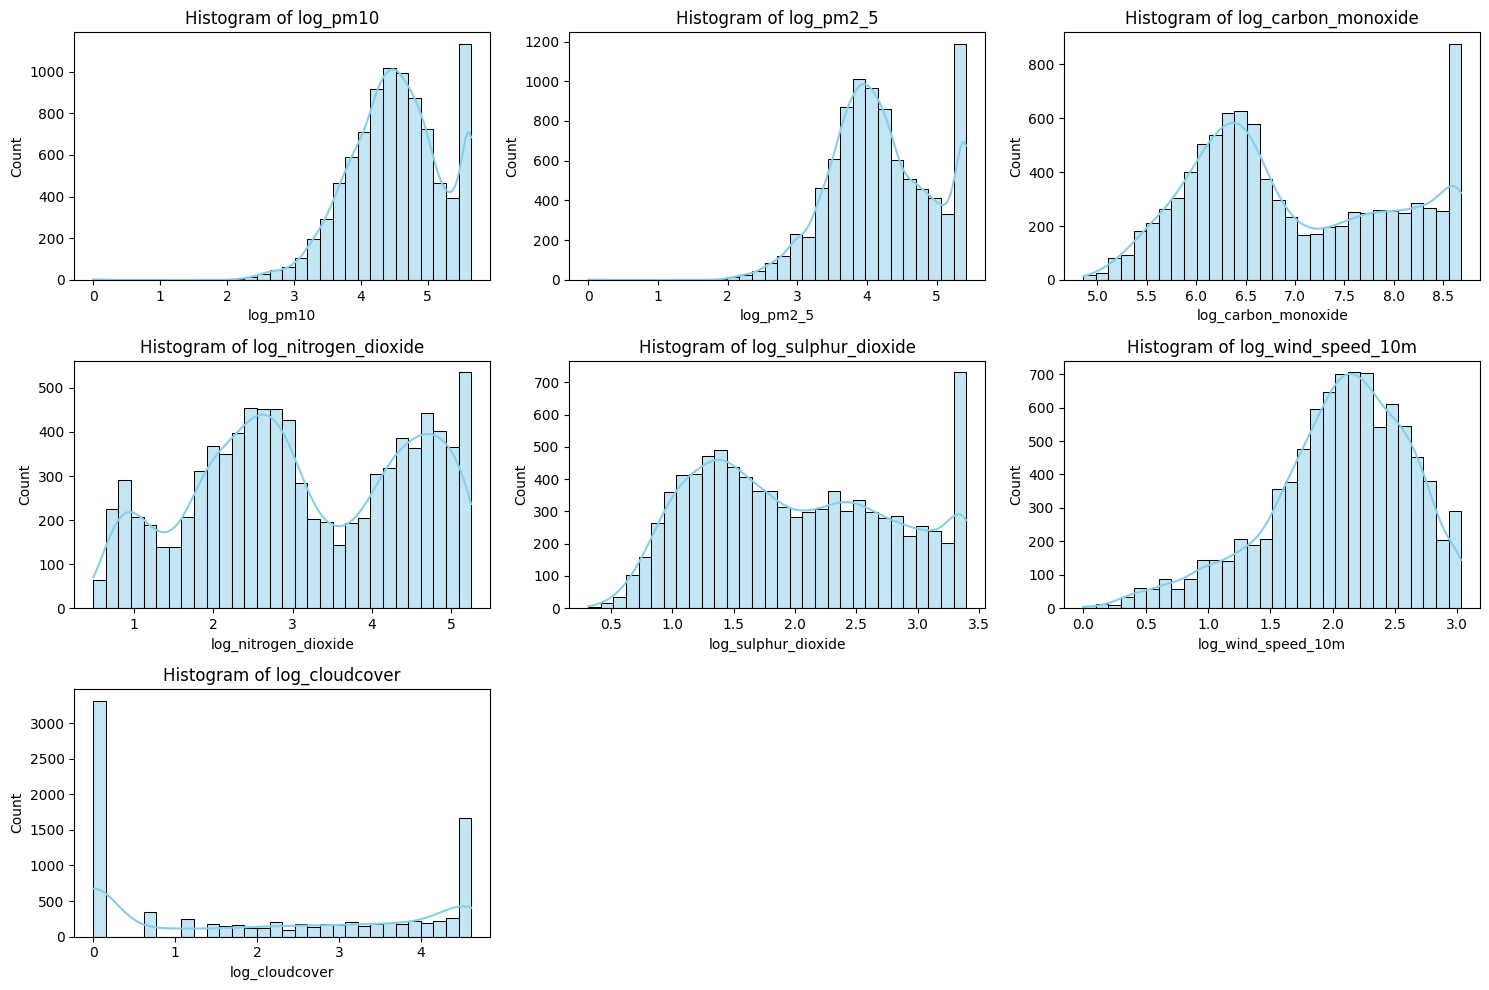

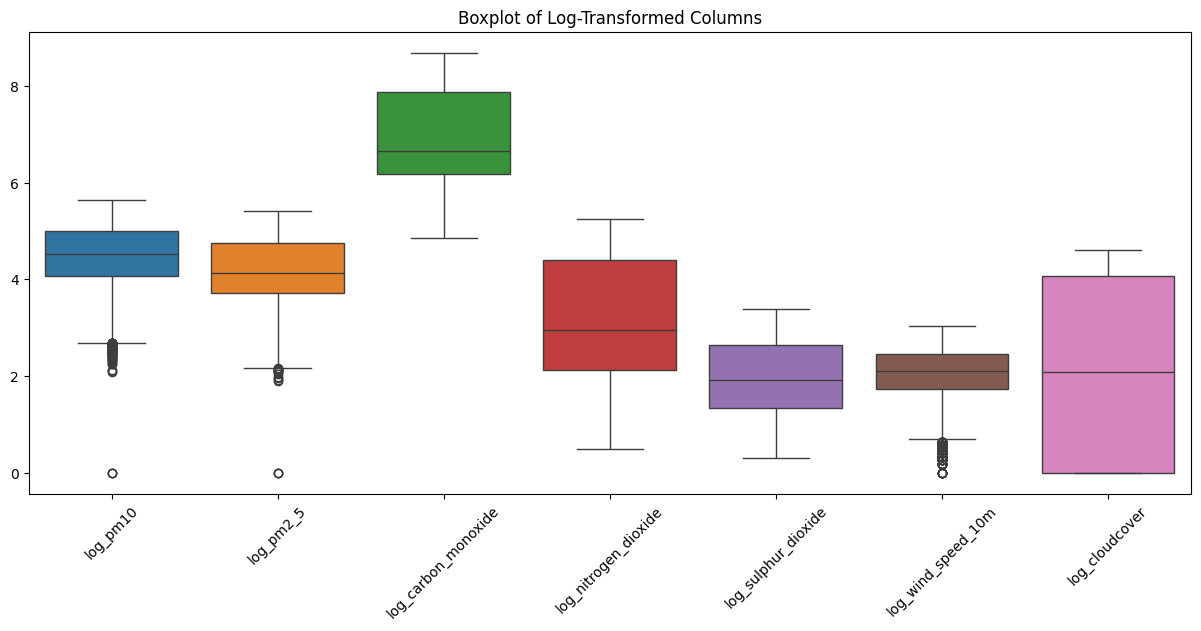

In [24]:
# List of log-transformed columns
log_cols = ['log_pm10','log_pm2_5','log_carbon_monoxide','log_nitrogen_dioxide',
            'log_sulphur_dioxide','log_wind_speed_10m','log_cloudcover']

# 1️⃣ Histograms
plt.figure(figsize=(15,10))
for i, col in enumerate(log_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_new[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# 2️⃣ Boxplots
plt.figure(figsize=(15,6))
sns.boxplot(data=df_new[log_cols])
plt.title("Boxplot of Log-Transformed Columns")
plt.xticks(rotation=45)
plt.show()

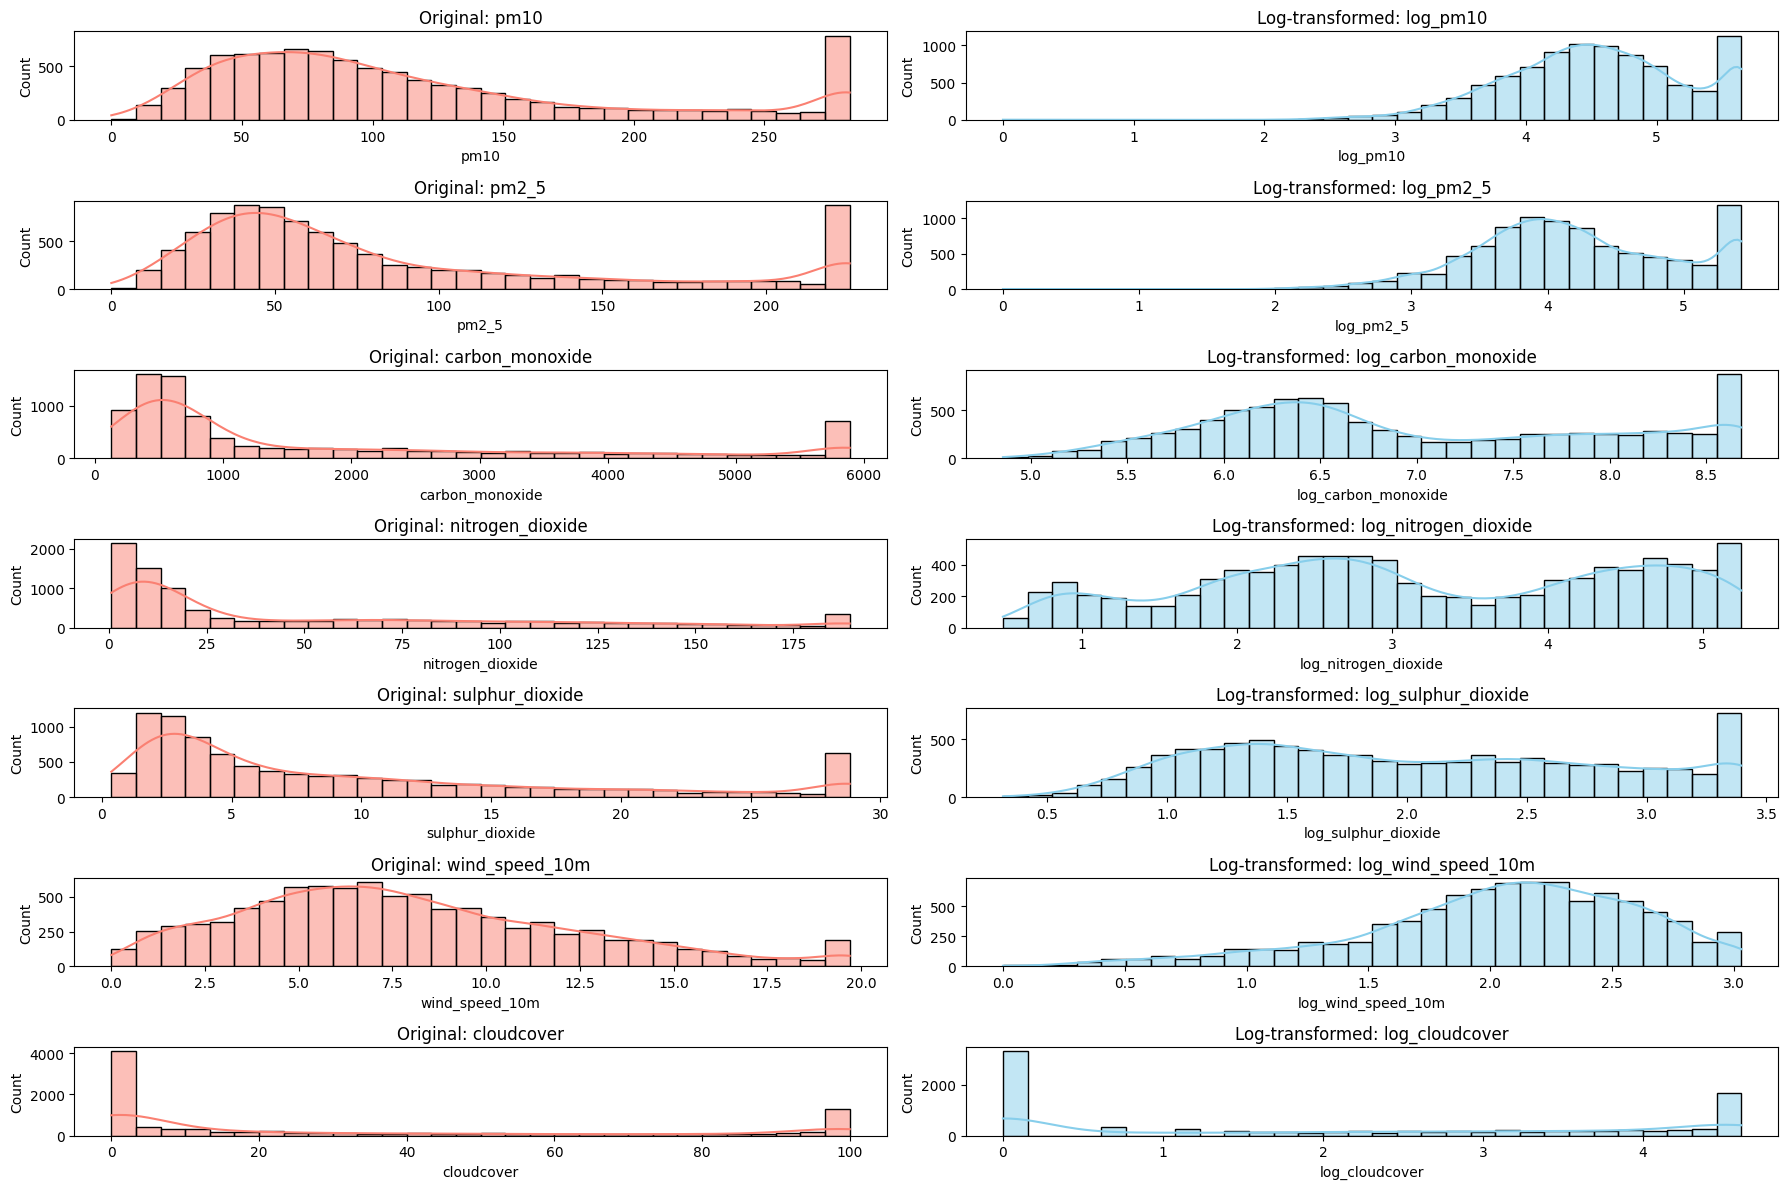

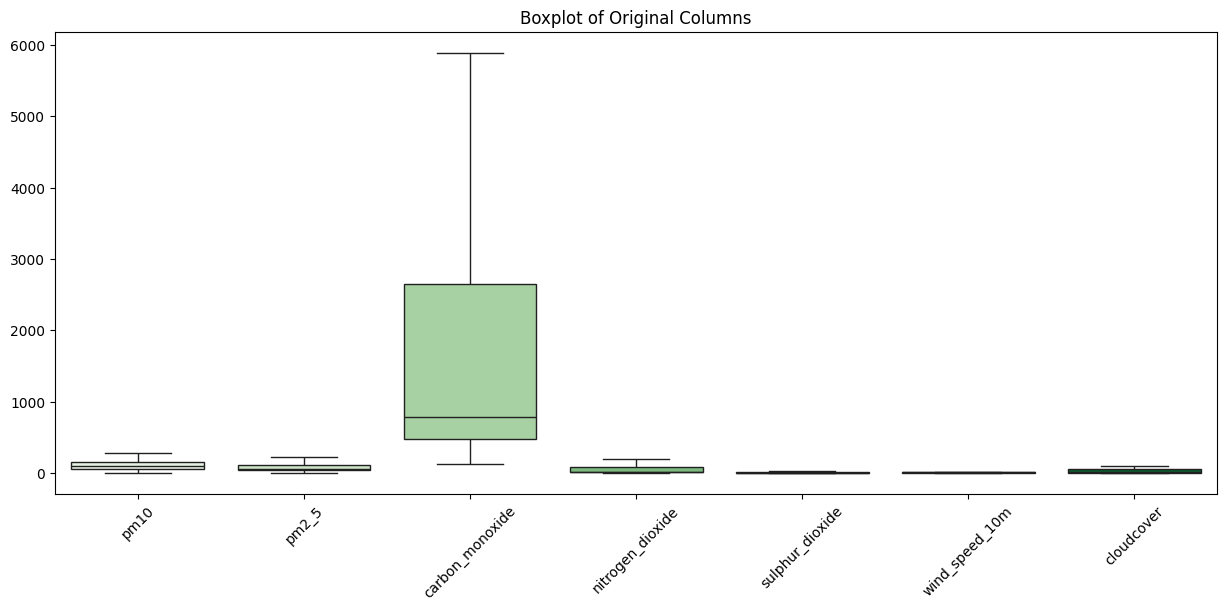

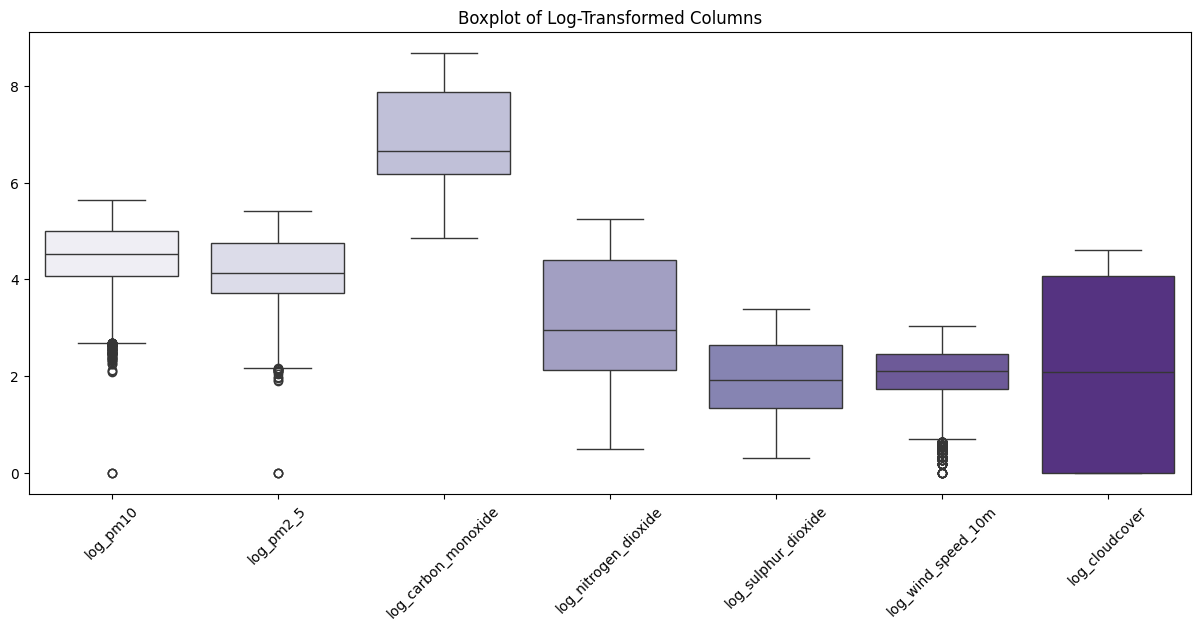

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original skewed columns (before log)
orig_cols = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide',
             'sulphur_dioxide','wind_speed_10m','cloudcover']

# Log-transformed columns
log_cols = ['log_pm10','log_pm2_5','log_carbon_monoxide','log_nitrogen_dioxide',
            'log_sulphur_dioxide','log_wind_speed_10m','log_cloudcover']

# 1️⃣ Histograms: Before vs After
plt.figure(figsize=(18,12))
for i, (orig, log) in enumerate(zip(orig_cols, log_cols), 1):
    # Original
    plt.subplot(7, 2, 2*i-1)
    sns.histplot(df_new[orig], kde=True, bins=30, color='salmon')
    plt.title(f'Original: {orig}')
    
    # Log-transformed
    plt.subplot(7, 2, 2*i)
    sns.histplot(df_new[log], kde=True, bins=30, color='skyblue')
    plt.title(f'Log-transformed: {log}')
    
plt.tight_layout()
plt.show()

# 2️⃣ Boxplots: Before vs After
plt.figure(figsize=(15,6))
sns.boxplot(data=df_new[orig_cols], palette="Greens")
plt.title("Boxplot of Original Columns")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(data=df_new[log_cols], palette="Purples")
plt.title("Boxplot of Log-Transformed Columns")
plt.xticks(rotation=45)
plt.show()


In [25]:
# Columns
orig_cols = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide',
             'sulphur_dioxide','wind_speed_10m','cloudcover']
log_cols = ['log_pm10','log_pm2_5','log_carbon_monoxide','log_nitrogen_dioxide',
            'log_sulphur_dioxide','log_wind_speed_10m','log_cloudcover']

# Create summary table
skew_table = pd.DataFrame({
    'Column': orig_cols,
    'Skew_Before': [df_new[col].skew() for col in orig_cols],
    'Skew_After_Log': [df_new[col].skew() for col in log_cols]
})

# Round for better readability
skew_table = skew_table.round(3)

skew_table

,Column,Skew_Before,Skew_After_Log
0,pm10,0.993,-0.311
1,pm2_5,1.105,-0.044
2,carbon_monoxide,1.220,0.304
3,nitrogen_dioxide,1.188,-0.063
4,sulphur_dioxide,1.142,0.213
5,wind_speed_10m,0.598,-0.718
6,cloudcover,0.943,0.121


In [26]:
df_new['day_of_week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [27]:
df_new['month'].unique()

array(['October', 'November', 'December', 'January', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September'],
      dtype=object)

In [28]:
df_new.dtypes

time                     object
pm10                    float64
pm2_5                   float64
carbon_monoxide         float64
nitrogen_dioxide        float64
sulphur_dioxide         float64
ozone                   float64
temperature_2m          float64
relative_humidity_2m    float64
wind_speed_10m          float64
pressure_msl            float64
precipitation           float64
cloudcover              float64
day_of_week              object
month                    object
log_pm10                float64
log_pm2_5               float64
log_carbon_monoxide     float64
log_nitrogen_dioxide    float64
log_sulphur_dioxide     float64
log_wind_speed_10m      float64
log_cloudcover          float64
dtype: object

In [29]:
# List of log-transformed columns
log_cols = ['log_pm10','log_pm2_5','log_carbon_monoxide','log_nitrogen_dioxide',
            'log_sulphur_dioxide','log_wind_speed_10m','log_cloudcover']

# Round to 2 decimal places
df_new[log_cols] = df_new[log_cols].round(2)

# Verify
df_new[log_cols].head()


,log_pm10,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover
0,5.00,4.82,8.00,4.55,2.09,2.12,0.0
1,4.92,4.74,7.80,4.38,1.95,2.03,0.0
2,4.82,4.63,7.58,4.06,1.83,2.21,0.0
3,4.66,4.47,7.35,3.68,1.72,2.23,0.0
4,4.53,4.32,7.18,3.43,1.62,2.22,0.0


In [30]:
# Create a copy for consistency checking
df_consistency = df_new.copy()

print("🔍 Feature Consistency Check Results\n")

# 1️⃣ Check for missing values
print("Missing values per column:")
print(df_consistency.isnull().sum())
print("\n")

# 2️⃣ Check for negative values in numeric columns
numeric_cols = df_consistency.select_dtypes(include='number').columns.tolist()
invalid_values = df_consistency[(df_consistency[numeric_cols] < 0).any(axis=1)]
print(f"Rows with negative numeric values: {invalid_values.shape[0]}")
print("\n")

# 3️⃣ Check time order (if 'time' column exists)
if 'time' in df_consistency.columns:
    print("Is 'time' column sorted?", df_consistency['time'].is_monotonic_increasing)
else:
    print("'time' column not found.")
print("\n")

# 4️⃣ Check categorical consistency for all object-type columns
cat_cols = df_consistency.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"Unique values in '{col}': {df_consistency[col].unique()}")
print("\n")

# 5️⃣ Numeric feature ranges and basic statistics
print("Statistical summary of numeric features:")
print(df_consistency[numeric_cols].describe())
print("\n")

# 6️⃣ Detect constant columns (no variation)
constant_cols = [col for col in df_consistency.columns if df_consistency[col].nunique() == 1]
if constant_cols:
    print("Columns with constant values (need checking):", constant_cols)
else:
    print("No constant columns found ✅")

print("\n✅ Full Feature Consistency Check Completed Successfully!")


🔍 Feature Consistency Check Results

Missing values per column:
time                    0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
sulphur_dioxide         0
ozone                   0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
pressure_msl            0
precipitation           0
cloudcover              0
day_of_week             0
month                   0
log_pm10                0
log_pm2_5               0
log_carbon_monoxide     0
log_nitrogen_dioxide    0
log_sulphur_dioxide     0
log_wind_speed_10m      0
log_cloudcover          0
dtype: int64


Rows with negative numeric values: 0


Is 'time' column sorted? True


Unique values in 'time': ['2024-10-01 00:00:00' '2024-10-01 01:00:00' '2024-10-01 02:00:00' ...
 '2025-10-11 22:00:00' '2025-10-11 23:00:00' '2025-10-12 00:00:00']
Unique values in 'day_of_week': ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
Unique va

In [31]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,cloudcover,day_of_week,month,log_pm10,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,0.0,Tuesday,October,5.00,4.82,8.00,4.55,2.09,2.12,0.00
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,0.0,Tuesday,October,4.92,4.74,7.80,4.38,1.95,2.03,0.00
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,0.0,Tuesday,October,4.82,4.63,7.58,4.06,1.83,2.21,0.00
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,0.0,Tuesday,October,4.66,4.47,7.35,3.68,1.72,2.23,0.00
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,0.0,Tuesday,October,4.53,4.32,7.18,3.43,1.62,2.22,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,0.0,Saturday,October,4.69,3.92,6.18,2.71,1.26,1.93,0.00
9386,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,0.0,Saturday,October,4.73,3.96,6.23,2.74,1.21,1.86,0.00
9387,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,0.0,Saturday,October,4.77,4.01,6.27,2.74,1.17,1.93,0.00
9388,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,0.0,Saturday,October,4.81,4.06,6.30,2.74,1.14,1.96,0.00


In [32]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover'],
      dtype='object')

                                                        Calculate AQI 

In [33]:
def calculate_aqi(pm25, pm10):
    # Helper function for sub-index calculation
    def aqi_subindex(Cp, Bp_lo, Bp_hi, I_lo, I_hi):
        return ((I_hi - I_lo) / (Bp_hi - Bp_lo)) * (Cp - Bp_lo) + I_lo

    # PM2.5 breakpoints
    pm25_breakpoints = [
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 500.4, 301, 500)
    ]

    # PM10 breakpoints
    pm10_breakpoints = [
        (0, 54, 0, 50),
        (55, 154, 51, 100),
        (155, 254, 101, 150),
        (255, 354, 151, 200),
        (355, 424, 201, 300),
        (425, 604, 301, 500)
    ]

    # Compute AQI for PM2.5
    aqi_pm25 = None
    for Bp_lo, Bp_hi, I_lo, I_hi in pm25_breakpoints:
        if Bp_lo <= pm25 <= Bp_hi:
            aqi_pm25 = aqi_subindex(pm25, Bp_lo, Bp_hi, I_lo, I_hi)
            break

    # Compute AQI for PM10
    aqi_pm10 = None
    for Bp_lo, Bp_hi, I_lo, I_hi in pm10_breakpoints:
        if Bp_lo <= pm10 <= Bp_hi:
            aqi_pm10 = aqi_subindex(pm10, Bp_lo, Bp_hi, I_lo, I_hi)
            break

    # Final AQI = max of both (dominant pollutant)
    if aqi_pm25 is not None and aqi_pm10 is not None:
        return max(aqi_pm25, aqi_pm10)
    elif aqi_pm25 is not None:
        return aqi_pm25
    elif aqi_pm10 is not None:
        return aqi_pm10
    else:
        return None

# ✅ Apply it to your DataFrame
df_new["AQI"] = df_new.apply(lambda row: calculate_aqi(row["pm2_5"], row["pm10"]), axis=1)
print(df_new[["pm2_5", "pm10", "AQI"]].head())


    pm2_5    pm10         AQI
0  122.47  147.37  185.578820
1  113.73  136.25  181.066070
2  101.89  122.54  174.952687
3   86.18  104.86  166.841096
4   74.04   91.56  160.572813


In [34]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI'],
      dtype='object')

In [35]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,day_of_week,month,log_pm10,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover,AQI
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,Tuesday,October,5.00,4.82,8.00,4.55,2.09,2.12,0.00,185.578820
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,Tuesday,October,4.92,4.74,7.80,4.38,1.95,2.03,0.00,181.066070
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,Tuesday,October,4.82,4.63,7.58,4.06,1.83,2.21,0.00,174.952687
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,Tuesday,October,4.66,4.47,7.35,3.68,1.72,2.23,0.00,166.841096
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,Tuesday,October,4.53,4.32,7.18,3.43,1.62,2.22,0.00,160.572813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,Saturday,October,4.69,3.92,6.18,2.71,1.26,1.93,0.00,135.078392
9386,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,Saturday,October,4.73,3.96,6.23,2.74,1.21,1.86,0.00,140.864824
9387,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,Saturday,October,4.77,4.01,6.27,2.74,1.17,1.93,0.00,147.143719
9388,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,Saturday,October,4.81,4.06,6.30,2.74,1.14,1.96,0.00,151.660906


In [36]:
df_new.isnull().sum()

time                    0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
sulphur_dioxide         0
ozone                   0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
pressure_msl            0
precipitation           0
cloudcover              0
day_of_week             0
month                   0
log_pm10                0
log_pm2_5               0
log_carbon_monoxide     0
log_nitrogen_dioxide    0
log_sulphur_dioxide     0
log_wind_speed_10m      0
log_cloudcover          0
AQI                     0
dtype: int64

In [37]:
corr_with_aqi = df_new[['precipitation', 'AQI']].corr()
print(corr_with_aqi)

               precipitation  AQI
precipitation            NaN  NaN
AQI                      NaN  1.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


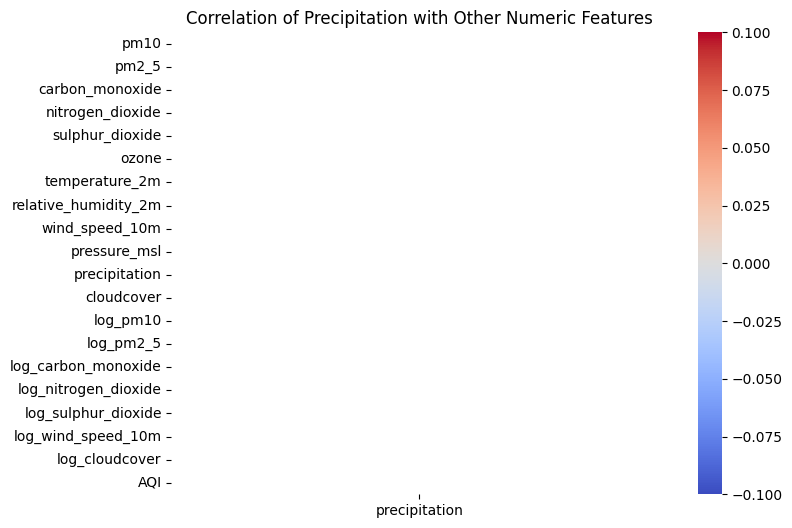

In [38]:
import seaborn as sns

# Only select numeric columns
numeric_df = df_new.select_dtypes(include=['number'])

# Compute correlation
corr_precip = numeric_df.corr()[['precipitation']].sort_values(by='precipitation', ascending=False)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_precip, annot=True, cmap='coolwarm')
plt.title("Correlation of Precipitation with Other Numeric Features")
plt.show()


In [39]:
# Check column data types and non-null counts
df_new.info()

# Check how many missing values remain in each column
df_new.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 9026 entries, 0 to 9389
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  9026 non-null   object 
 1   pm10                  9026 non-null   float64
 2   pm2_5                 9026 non-null   float64
 3   carbon_monoxide       9026 non-null   float64
 4   nitrogen_dioxide      9026 non-null   float64
 5   sulphur_dioxide       9026 non-null   float64
 6   ozone                 9026 non-null   float64
 7   temperature_2m        9026 non-null   float64
 8   relative_humidity_2m  9026 non-null   float64
 9   wind_speed_10m        9026 non-null   float64
 10  pressure_msl          9026 non-null   float64
 11  precipitation         9026 non-null   float64
 12  cloudcover            9026 non-null   float64
 13  day_of_week           9026 non-null   object 
 14  month                 9026 non-null   object 
 15  log_pm10              9026

time                    0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
sulphur_dioxide         0
ozone                   0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
pressure_msl            0
precipitation           0
cloudcover              0
day_of_week             0
month                   0
log_pm10                0
log_pm2_5               0
log_carbon_monoxide     0
log_nitrogen_dioxide    0
log_sulphur_dioxide     0
log_wind_speed_10m      0
log_cloudcover          0
AQI                     0
dtype: int64

                                                        Feature Enginnering 

⏰ Time-based feature

In [40]:
# Ensure time column is in datetime format
df_new['time'] = pd.to_datetime(df_new['time'])

# Extract only required time-based features
df_new['hour'] = df_new['time'].dt.hour
df_new['day'] = df_new['time'].dt.day
df_new['month'] = df_new['time'].dt.month

print(df_new[['time', 'hour', 'day', 'month']].head())

                 time  hour  day  month
0 2024-10-01 00:00:00     0    1     10
1 2024-10-01 01:00:00     1    1     10
2 2024-10-01 02:00:00     2    1     10
3 2024-10-01 03:00:00     3    1     10
4 2024-10-01 04:00:00     4    1     10


In [41]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI', 'hour', 'day'],
      dtype='object')

                                                    🔁 AQI change rate

In [42]:
# Strip extra spaces from column names
df_new.columns = df_new.columns.str.strip()

# Ensure 'time' is datetime and sort
df_new['time'] = pd.to_datetime(df_new['time'])
df_new = df_new.sort_values('time').reset_index(drop=True)

# Compute AQI_change_rate and add as a new column
df_new['AQI_change_rate'] = df_new['AQI'].diff().fillna(0)

# ✅ Do NOT drop other columns
# Now your DataFrame keeps all original columns + AQI_change_rate
print(df_new.head(10))

                 time    pm10   pm2_5  carbon_monoxide  nitrogen_dioxide  \
0 2024-10-01 00:00:00  147.37  122.47          2990.72             93.22   
1 2024-10-01 01:00:00  136.25  113.73          2429.96             78.83   
2 2024-10-01 02:00:00  122.54  101.89          1949.31             56.89   
3 2024-10-01 03:00:00  104.86   86.18          1548.77             38.73   
4 2024-10-01 04:00:00   91.56   74.04          1308.44             29.82   
5 2024-10-01 05:00:00   82.93   65.99          1214.98             28.10   
6 2024-10-01 06:00:00   79.13   61.37          1308.44             34.96   
7 2024-10-01 07:00:00   87.57   66.54          1895.90             47.98   
8 2024-10-01 08:00:00   99.89   75.60          2803.80             56.21   
9 2024-10-01 09:00:00   93.55   69.95          2696.99             66.49   

   sulphur_dioxide  ozone  temperature_2m  relative_humidity_2m  \
0             7.09   0.31            24.6                  73.0   
1             6.02   4.60    

In [43]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI', 'hour', 'day', 'AQI_change_rate'],
      dtype='object')

In [44]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,log_pm2_5,log_carbon_monoxide,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover,AQI,hour,day,AQI_change_rate
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,4.82,8.00,4.55,2.09,2.12,0.00,185.578820,0,1,0.000000
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,4.74,7.80,4.38,1.95,2.03,0.00,181.066070,1,1,-4.512750
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,4.63,7.58,4.06,1.83,2.21,0.00,174.952687,2,1,-6.113383
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,4.47,7.35,3.68,1.72,2.23,0.00,166.841096,3,1,-8.111591
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,4.32,7.18,3.43,1.62,2.22,0.00,160.572813,4,1,-6.268282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,3.92,6.18,2.71,1.26,1.93,0.00,135.078392,20,11,6.919095
9022,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,3.96,6.23,2.74,1.21,1.86,0.00,140.864824,21,11,5.786432
9023,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,4.01,6.27,2.74,1.17,1.93,0.00,147.143719,22,11,6.278894
9024,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,4.06,6.30,2.74,1.14,1.96,0.00,151.660906,23,11,4.517188


                                                        Rolling Average

In [45]:
# Ensure 'time' is datetime and sort
df_new['time'] = pd.to_datetime(df_new['time'])
df_new = df_new.sort_values('time').reset_index(drop=True)

# Compute rolling averages for AQI
# 3-hour rolling average
df_new['AQI_rolling_mean_3hr'] = df_new['AQI'].rolling(window=3, min_periods=1).mean()

# 6-hour rolling average (optional, for longer trends)
df_new['AQI_rolling_mean_6hr'] = df_new['AQI'].rolling(window=6, min_periods=1).mean()

# Display the result
print(df_new[['time', 'AQI', 'AQI_rolling_mean_3hr', 'AQI_rolling_mean_6hr']].head(10))

                 time         AQI  AQI_rolling_mean_3hr  AQI_rolling_mean_6hr
0 2024-10-01 00:00:00  185.578820            185.578820            185.578820
1 2024-10-01 01:00:00  181.066070            183.322445            183.322445
2 2024-10-01 02:00:00  174.952687            180.532525            180.532525
3 2024-10-01 03:00:00  166.841096            174.286617            177.109668
4 2024-10-01 04:00:00  160.572813            167.455532            173.802297
5 2024-10-01 05:00:00  156.416333            161.276747            170.904636
6 2024-10-01 06:00:00  154.030875            157.006674            165.646646
7 2024-10-01 07:00:00  156.700316            155.715841            161.585687
8 2024-10-01 08:00:00  161.378293            157.369828            159.323288
9 2024-10-01 09:00:00  158.461012            158.846540            157.926607


In [46]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,log_nitrogen_dioxide,log_sulphur_dioxide,log_wind_speed_10m,log_cloudcover,AQI,hour,day,AQI_change_rate,AQI_rolling_mean_3hr,AQI_rolling_mean_6hr
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,4.55,2.09,2.12,0.00,185.578820,0,1,0.000000,185.578820,185.578820
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,4.38,1.95,2.03,0.00,181.066070,1,1,-4.512750,183.322445,183.322445
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,4.06,1.83,2.21,0.00,174.952687,2,1,-6.113383,180.532525,180.532525
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,3.68,1.72,2.23,0.00,166.841096,3,1,-8.111591,174.286617,177.109668
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,3.43,1.62,2.22,0.00,160.572813,4,1,-6.268282,167.455532,173.802297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,2.71,1.26,1.93,0.00,135.078392,20,11,6.919095,128.561474,123.123869
9022,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,2.74,1.21,1.86,0.00,140.864824,21,11,5.786432,134.700838,127.313903
9023,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,2.74,1.17,1.93,0.00,147.143719,22,11,6.278894,141.028978,132.209799
9024,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,2.74,1.14,1.96,0.00,151.660906,23,11,4.517188,146.556483,137.558979


In [47]:
# Ensure datetime and sort
df_new['time'] = pd.to_datetime(df_new['time'])
df_new= df_new.sort_values('time').reset_index(drop=True)

# Compute 3-hour rolling averages for PM2.5 and PM10
df_new['PM2_5_rolling_mean_3hr'] = df_new['pm2_5'].rolling(window=3, min_periods=1).mean()
df_new['PM10_rolling_mean_3hr'] = df_new['pm10'].rolling(window=3, min_periods=1).mean()

# Display result
print(df_new[['time', 'pm2_5', 'PM2_5_rolling_mean_3hr', 'pm10', 'PM10_rolling_mean_3hr']].head(10))

                 time   pm2_5  PM2_5_rolling_mean_3hr    pm10  \
0 2024-10-01 00:00:00  122.47              122.470000  147.37   
1 2024-10-01 01:00:00  113.73              118.100000  136.25   
2 2024-10-01 02:00:00  101.89              112.696667  122.54   
3 2024-10-01 03:00:00   86.18              100.600000  104.86   
4 2024-10-01 04:00:00   74.04               87.370000   91.56   
5 2024-10-01 05:00:00   65.99               75.403333   82.93   
6 2024-10-01 06:00:00   61.37               67.133333   79.13   
7 2024-10-01 07:00:00   66.54               64.633333   87.57   
8 2024-10-01 08:00:00   75.60               67.836667   99.89   
9 2024-10-01 09:00:00   69.95               70.696667   93.55   

   PM10_rolling_mean_3hr  
0             147.370000  
1             141.810000  
2             135.386667  
3             121.216667  
4             106.320000  
5              93.116667  
6              84.540000  
7              83.210000  
8              88.863333  
9             

In [48]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI', 'hour', 'day', 'AQI_change_rate',
       'AQI_rolling_mean_3hr', 'AQI_rolling_mean_6hr',
       'PM2_5_rolling_mean_3hr', 'PM10_rolling_mean_3hr'],
      dtype='object')

                                                Weather Interaction Features

In [49]:
# Weather interaction features
df_new['temp_wind'] = df_new['temperature_2m'] * df['wind_speed_10m']
df_new['humidity_pressure'] = df_new['relative_humidity_2m'] / df_new['pressure_msl']

# Display the new features
print(df_new[['temp_wind', 'humidity_pressure']].head(10))


   temp_wind  humidity_pressure
0     179.58           0.072471
1     153.78           0.076480
2     190.35           0.070577
3     199.20           0.065619
4     195.16           0.066614
5     202.92           0.071578
6     186.44           0.071578
7     154.38           0.071542
8     227.04           0.065548
9     261.90           0.067514


In [50]:
df_new.columns

Index(['time', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'pressure_msl', 'precipitation', 'cloudcover',
       'day_of_week', 'month', 'log_pm10', 'log_pm2_5', 'log_carbon_monoxide',
       'log_nitrogen_dioxide', 'log_sulphur_dioxide', 'log_wind_speed_10m',
       'log_cloudcover', 'AQI', 'hour', 'day', 'AQI_change_rate',
       'AQI_rolling_mean_3hr', 'AQI_rolling_mean_6hr',
       'PM2_5_rolling_mean_3hr', 'PM10_rolling_mean_3hr', 'temp_wind',
       'humidity_pressure'],
      dtype='object')

In [51]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,AQI,hour,day,AQI_change_rate,AQI_rolling_mean_3hr,AQI_rolling_mean_6hr,PM2_5_rolling_mean_3hr,PM10_rolling_mean_3hr,temp_wind,humidity_pressure
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,185.578820,0,1,0.000000,185.578820,185.578820,122.470000,147.370000,179.58,0.072471
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,181.066070,1,1,-4.512750,183.322445,183.322445,118.100000,141.810000,153.78,0.076480
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,174.952687,2,1,-6.113383,180.532525,180.532525,112.696667,135.386667,190.35,0.070577
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,166.841096,3,1,-8.111591,174.286617,177.109668,100.600000,121.216667,199.20,0.065619
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,160.572813,4,1,-6.268282,167.455532,173.802297,87.370000,106.320000,195.16,0.066614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,135.078392,20,11,6.919095,128.561474,123.123869,46.693333,103.946667,172.26,0.055298
9022,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,140.864824,21,11,5.786432,134.700838,127.313903,49.186667,107.470000,183.60,0.045419
9023,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,147.143719,22,11,6.278894,141.028978,132.209799,51.756667,112.200000,170.98,0.041473
9024,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,151.660906,23,11,4.517188,146.556483,137.558979,54.236667,117.146667,111.15,0.046420


In [52]:
cols_to_round = ['AQI', 'AQI_change_rate', 'AQI_rolling_mean_3hr', 
                 'AQI_rolling_mean_6hr', 'PM2_5_rolling_mean_3hr', 'PM10_rolling_mean_3hr',
                 'temp_wind', 'humidity_pressure']
df_new[cols_to_round] = df_new[cols_to_round].round(3)


In [53]:
df_new

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,AQI,hour,day,AQI_change_rate,AQI_rolling_mean_3hr,AQI_rolling_mean_6hr,PM2_5_rolling_mean_3hr,PM10_rolling_mean_3hr,temp_wind,humidity_pressure
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.22,7.09,0.31,24.6,73.0,7.3,...,185.579,0,1,0.000,185.579,185.579,122.470,147.370,179.58,0.072
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.83,6.02,4.60,23.3,77.0,6.6,...,181.066,1,1,-4.513,183.322,183.322,118.100,141.810,153.78,0.076
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.89,5.25,21.64,23.5,71.0,8.1,...,174.953,2,1,-6.113,180.533,180.533,112.697,135.387,190.35,0.071
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.73,4.59,38.27,24.0,66.0,8.3,...,166.841,3,1,-8.112,174.287,177.110,100.600,121.217,199.20,0.066
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.82,4.05,37.55,23.8,67.0,8.2,...,160.573,4,1,-6.268,167.456,173.802,87.370,106.320,195.16,0.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,2025-10-11 20:00:00,107.49,49.34,479.90,13.98,2.54,81.36,19.8,56.0,5.9,...,135.078,20,11,6.919,128.561,123.124,46.693,103.947,172.26,0.055
9022,2025-10-11 21:00:00,111.84,51.69,507.10,14.44,2.35,72.38,20.4,46.0,5.4,...,140.865,21,11,5.786,134.701,127.314,49.187,107.470,183.60,0.045
9023,2025-10-11 22:00:00,117.27,54.24,529.14,14.56,2.23,66.13,20.6,42.0,5.9,...,147.144,22,11,6.279,141.029,132.210,51.757,112.200,170.98,0.041
9024,2025-10-11 23:00:00,122.33,56.78,541.89,14.47,2.13,61.54,19.5,47.0,6.1,...,151.661,23,11,4.517,146.556,137.559,54.237,117.147,111.15,0.046


In [55]:
cols_to_round = ["pm10", "pm2_5", "carbon_monoxide"]
df_new[cols_to_round] = df_new[cols_to_round].round(2)


In [56]:
df_new.head(50)

,time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,wind_speed_10m,...,AQI,hour,day,AQI_change_rate,AQI_rolling_mean_3hr,AQI_rolling_mean_6hr,PM2_5_rolling_mean_3hr,PM10_rolling_mean_3hr,temp_wind,humidity_pressure
0,2024-10-01 00:00:00,147.37,122.47,2990.72,93.220,7.090,0.310,24.6,73.0,7.3,...,185.579,0,1,0.000,185.579,185.579,122.470,147.370,179.58,0.072
1,2024-10-01 01:00:00,136.25,113.73,2429.96,78.830,6.020,4.600,23.3,77.0,6.6,...,181.066,1,1,-4.513,183.322,183.322,118.100,141.810,153.78,0.076
2,2024-10-01 02:00:00,122.54,101.89,1949.31,56.890,5.250,21.640,23.5,71.0,8.1,...,174.953,2,1,-6.113,180.533,180.533,112.697,135.387,190.35,0.071
3,2024-10-01 03:00:00,104.86,86.18,1548.77,38.730,4.590,38.270,24.0,66.0,8.3,...,166.841,3,1,-8.112,174.287,177.110,100.600,121.217,199.20,0.066
4,2024-10-01 04:00:00,91.56,74.04,1308.44,29.820,4.050,37.550,23.8,67.0,8.2,...,160.573,4,1,-6.268,167.456,173.802,87.370,106.320,195.16,0.067
5,2024-10-01 05:00:00,82.93,65.99,1214.98,28.100,3.930,30.400,22.8,72.0,8.9,...,156.416,5,1,-4.156,161.277,170.905,75.403,93.117,202.92,0.072
6,2024-10-01 06:00:00,79.13,61.37,1308.44,34.960,4.590,15.740,23.6,72.0,7.9,...,154.031,6,1,-2.385,157.007,165.647,67.133,84.540,186.44,0.072
7,2024-10-01 07:00:00,87.57,66.54,1895.90,47.980,6.500,1.560,24.9,72.0,6.2,...,156.700,7,1,2.669,155.716,161.586,64.633,83.210,154.38,0.072
8,2024-10-01 08:00:00,99.89,75.60,2803.80,56.210,8.460,6.350,26.4,66.0,8.6,...,161.378,8,1,4.678,157.370,159.323,67.837,88.863,227.04,0.066
9,2024-10-01 09:00:00,93.55,69.95,2696.99,66.490,9.780,22.890,27.0,68.0,9.7,...,158.461,9,1,-2.917,158.847,157.927,70.697,93.670,261.90,0.068


In [57]:
df_new.to_csv('aqi_feature_set_v1.csv', index=False)

                                                        THE END 